# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865028e-11
W1 max relative error: 3.669858e-09
b1 max relative error: 2.738422e-09


In [6]:
a=np.array([1,-4,5,-7])
np.maximum(a,0)

array([1, 0, 5, 0])

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732023


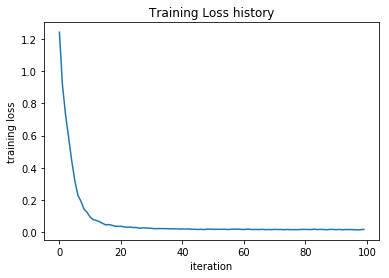

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [15]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



[[0.09996483 0.09999844 0.10000722 ... 0.09999315 0.10000811 0.0999964 ]
 [0.09996773 0.09998796 0.09997541 ... 0.10001467 0.10001483 0.10000448]
 [0.09996016 0.09999356 0.09999033 ... 0.10003105 0.09999338 0.09995331]
 ...
 [0.09996629 0.10001197 0.09999186 ... 0.10000426 0.09999689 0.10000024]
 [0.09996911 0.10001838 0.09996241 ... 0.10000004 0.09997594 0.10004401]
 [0.09995026 0.10001876 0.0999665  ... 0.10002034 0.1000063  0.10001172]]
[0.09996483 0.09998516 0.09995331 0.10000181 0.09998812 0.09999783
 0.09999905 0.10000487 0.10000249 0.0999927  0.09997811 0.10001974
 0.09996327 0.09998436 0.10000773 0.100013   0.10000203 0.09997198
 0.09998811 0.10003687 0.10000807 0.09999773 0.09999915 0.1000036
 0.09998041 0.10000244 0.100008   0.10004469 0.09995075 0.10000256
 0.10001131 0.1000079  0.10001754 0.09997744 0.10003871 0.10001609
 0.10000147 0.09997502 0.09999354 0.10001596 0.09998802 0.10000501
 0.10000682 0.0999982  0.10000384 0.09994674 0.10000024 0.09999294
 0.09999447 0.1000204

[[0.09998397 0.09999149 0.09997301 ... 0.10002124 0.09999888 0.09999887]
 [0.09994784 0.10000481 0.09997437 ... 0.09999771 0.09999538 0.10002707]
 [0.09998911 0.10000543 0.09999791 ... 0.10000939 0.09999679 0.09999141]
 ...
 [0.09994507 0.10001166 0.099967   ... 0.1000092  0.1000291  0.09997756]
 [0.09996576 0.09998825 0.09996764 ... 0.10000635 0.10000735 0.09999138]
 [0.09997898 0.099997   0.09998599 ... 0.1000061  0.10002066 0.09996773]]
[0.09999149 0.10000481 0.10000222 0.09999904 0.10001784 0.09998135
 0.09998455 0.09999558 0.09999733 0.09997142 0.09999563 0.10004685
 0.09999188 0.09996457 0.10001327 0.10000309 0.09999234 0.1000069
 0.10002195 0.10001532 0.09997554 0.09997655 0.10000388 0.10000661
 0.1000002  0.09999602 0.09999278 0.10003228 0.10001273 0.09996368
 0.10001341 0.10001598 0.09999794 0.09997692 0.09999198 0.09996175
 0.1000079  0.09999635 0.09996143 0.10005507 0.09996106 0.10001896
 0.09996    0.10005446 0.100003   0.10003335 0.10001227 0.09999793
 0.09999584 0.1000032

 0.10001975 0.09998324]
[[0.09993743 0.0999901  0.09995516 ... 0.1000182  0.09998549 0.10000459]
 [0.10000381 0.0999944  0.09998891 ... 0.10001264 0.10000048 0.09996935]
 [0.09998307 0.09998936 0.09997375 ... 0.10001276 0.10000483 0.10001868]
 ...
 [0.09997436 0.10001451 0.09995883 ... 0.10000299 0.09999684 0.09999854]
 [0.09995296 0.09998364 0.09996874 ... 0.10003514 0.09997275 0.10002525]
 [0.09998839 0.10001579 0.09995188 ... 0.10000068 0.10001179 0.10000962]]
[0.1000314  0.09996935 0.10001868 0.09998205 0.10001335 0.1000036
 0.09998008 0.09998407 0.09998266 0.10000899 0.09999388 0.09998749
 0.10001639 0.09998592 0.10000693 0.09997396 0.09998303 0.10003847
 0.09999807 0.10002876 0.09999929 0.10000136 0.09999756 0.10001343
 0.10000455 0.10000008 0.10000623 0.09997695 0.0999786  0.09999516
 0.10000023 0.09994925 0.09997918 0.09998455 0.10000598 0.10002349
 0.10003115 0.10001361 0.09999957 0.0999479  0.10000731 0.10005766
 0.09997831 0.09997194 0.09999178 0.10000452 0.10000606 0.099983

 0.09996891 0.10000404]
[[0.09998903 0.09999906 0.10000828 ... 0.1000022  0.10000739 0.09998722]
 [0.09995647 0.09998602 0.09996616 ... 0.10003546 0.09999338 0.1000085 ]
 [0.09999205 0.09998828 0.09998476 ... 0.10000441 0.10002797 0.09999606]
 ...
 [0.09996559 0.10000171 0.09997107 ... 0.10002614 0.09999467 0.09999207]
 [0.09993045 0.10001438 0.09995272 ... 0.10001704 0.09999396 0.09998471]
 [0.09997654 0.09999852 0.09998911 ... 0.10000139 0.09999489 0.1000182 ]]
[0.1000069  0.1000085  0.09999205 0.10000771 0.10002824 0.10001259
 0.10001177 0.09999804 0.1000125  0.1000083  0.09999831 0.1000375
 0.09996904 0.09997864 0.09998224 0.09999087 0.09998728 0.1000523
 0.09996743 0.10000056 0.09997807 0.10000421 0.10001065 0.0999902
 0.10002674 0.09999709 0.09999084 0.10001444 0.10000618 0.09999985
 0.10002143 0.10000294 0.09998781 0.10003324 0.10000014 0.1000084
 0.10001177 0.10002202 0.10005967 0.10001038 0.10002052 0.10000069
 0.10000482 0.10000223 0.09998829 0.09995911 0.09998895 0.09999168


 0.10000292 0.09999072]
[[0.10000108 0.09999492 0.09998858 ... 0.10000799 0.10000401 0.09999746]
 [0.09996476 0.10000309 0.09998372 ... 0.10001181 0.10000568 0.09999097]
 [0.10001785 0.09999896 0.09998755 ... 0.09998553 0.10001394 0.10001364]
 ...
 [0.09997489 0.1000042  0.09997522 ... 0.1000317  0.09999112 0.10000469]
 [0.09995016 0.09999402 0.09997936 ... 0.0999909  0.10001043 0.09997915]
 [0.099971   0.09999869 0.09999615 ... 0.09998977 0.10000923 0.09998536]]
[0.09999492 0.09999545 0.10001785 0.0999969  0.10001916 0.10000362
 0.09999022 0.10000381 0.09997071 0.1000016  0.09998403 0.10006126
 0.10003893 0.10003901 0.10001547 0.100041   0.10001975 0.1000157
 0.100034   0.10001166 0.09998971 0.09999596 0.10000962 0.10000519
 0.10003094 0.0999561  0.09999377 0.09999986 0.09999271 0.10000578
 0.09998235 0.10001913 0.10003258 0.10003123 0.09996698 0.09999216
 0.09997648 0.09998008 0.09998842 0.10002915 0.0999965  0.10000181
 0.10003397 0.09999541 0.09999724 0.09998765 0.10003364 0.100014

 0.10000058 0.09999882]
[[0.10001289 0.10001351 0.09995849 ... 0.10000142 0.10002106 0.1000076 ]
 [0.09999057 0.0999892  0.09998586 ... 0.10001518 0.1000336  0.10000848]
 [0.0999762  0.10001355 0.09994143 ... 0.10000815 0.10001015 0.09998433]
 ...
 [0.10000752 0.1000058  0.0999796  ... 0.09999885 0.10001679 0.10001742]
 [0.09997247 0.10000919 0.0999767  ... 0.10000812 0.09997931 0.10000196]
 [0.09995499 0.10001834 0.0999784  ... 0.10000221 0.09998908 0.09999315]]
[0.09998627 0.09999057 0.10001355 0.09999473 0.09999976 0.1000269
 0.09999692 0.09999128 0.09997378 0.09998759 0.09999714 0.09999874
 0.10001372 0.09998989 0.1000042  0.10002665 0.10002192 0.10000572
 0.10000652 0.10001489 0.10004187 0.10000907 0.09999939 0.09999832
 0.10001936 0.10000884 0.100038   0.09999978 0.10002512 0.09999804
 0.09999657 0.10000164 0.09998838 0.10003979 0.10001747 0.09998349
 0.09999936 0.10004954 0.09999282 0.10001451 0.10002449 0.10001836
 0.09999035 0.09996962 0.0999928  0.09999971 0.09999    0.100037

 0.09998976 0.10000912]
[[0.09999244 0.10000003 0.0999944  ... 0.10001275 0.09999675 0.09999481]
 [0.09998881 0.10000009 0.09999165 ... 0.10000311 0.09999381 0.10000135]
 [0.09999823 0.0999776  0.10000466 ... 0.10001722 0.10001358 0.09998139]
 ...
 [0.10000395 0.09999811 0.09997168 ... 0.09998479 0.10005191 0.09998044]
 [0.10002726 0.09999232 0.09997768 ... 0.0999848  0.10006144 0.09998295]
 [0.09998324 0.10000638 0.09997212 ... 0.09999489 0.09998145 0.10000744]]
[0.09999244 0.10001062 0.10000466 0.09998563 0.09998576 0.10000856
 0.09998561 0.10000068 0.10002388 0.10000598 0.10000459 0.10002905
 0.0999844  0.10001971 0.10003028 0.09996302 0.09999727 0.10002113
 0.10004078 0.10002502 0.10003096 0.10006855 0.09999175 0.1000387
 0.10001124 0.10000213 0.09999253 0.10000285 0.09999884 0.10002682
 0.10000213 0.10003696 0.10001347 0.10001193 0.10000687 0.09995448
 0.10002562 0.09999497 0.09997527 0.09994847 0.10009748 0.09995309
 0.09998461 0.1000601  0.1000187  0.10003323 0.10000575 0.099955

[0.09999465 0.10000924 0.09999195 0.09999427 0.0999926  0.09999969
 0.10002772 0.09999442 0.10002054 0.10003043 0.10003006 0.10000643
 0.09999177 0.10005999 0.10001221 0.09998036 0.10000135 0.10002746
 0.10002309 0.10002534 0.09999559 0.10000575 0.09997786 0.09999896
 0.0999834  0.09998923 0.10003069 0.10002812 0.10000222 0.10000842
 0.1000216  0.10007246 0.10000613 0.10006215 0.10002672 0.10002259
 0.10000324 0.10002589 0.1000354  0.09996464 0.09999499 0.09999501
 0.09996946 0.09998065 0.10000712 0.10001116 0.10001519 0.10000543
 0.09997788 0.10004075 0.10001794 0.10002176 0.10000449 0.09999439
 0.10005454 0.10001312 0.10001088 0.1000478  0.09999832 0.10001066
 0.10001691 0.09996597 0.09999894 0.10000356 0.10000116 0.10006783
 0.10006233 0.10001625 0.10001246 0.09996976 0.10002463 0.10008606
 0.10005633 0.10004687 0.10001474 0.10000856 0.09999785 0.10002494
 0.09998758 0.10001493 0.10004311 0.10005573 0.09999962 0.09999493
 0.10009654 0.10000107 0.10002194 0.10002833 0.10002977 0.0999

 0.09996981 0.09999967]
[[0.10000797 0.10000138 0.09997706 ... 0.0999847  0.10001162 0.10001531]
 [0.10001821 0.09999443 0.09998055 ... 0.10001563 0.10003241 0.09999474]
 [0.10004645 0.09997791 0.0999847  ... 0.09997177 0.10007486 0.09999648]
 ...
 [0.09991881 0.10000841 0.09996274 ... 0.10003005 0.0999606  0.09998285]
 [0.09994188 0.10000622 0.09996411 ... 0.10003112 0.09999368 0.09997414]
 [0.09986355 0.09999748 0.09994534 ... 0.10001015 0.09999541 0.09994358]]
[0.09997706 0.10001167 0.0999847  0.100061   0.09999148 0.10000213
 0.0999719  0.1000155  0.1000678  0.10002532 0.10001793 0.10001256
 0.1000315  0.1000002  0.09999959 0.10002911 0.10001288 0.10001074
 0.10002801 0.10001979 0.10000624 0.10001595 0.10006971 0.10000118
 0.10005449 0.10004386 0.09999658 0.09999005 0.10001008 0.10003931
 0.10005593 0.10005736 0.09995843 0.09999864 0.09998961 0.10002326
 0.09999365 0.09999621 0.10002712 0.10000012 0.10000192 0.09999175
 0.10004327 0.10008578 0.10001606 0.09999772 0.10001867 0.09999

 0.10003076 0.09998224]
[[0.09996417 0.09999691 0.09995205 ... 0.10002026 0.09996585 0.10002007]
 [0.09992706 0.10000907 0.09995152 ... 0.100013   0.10000625 0.09994786]
 [0.10004497 0.10000946 0.09997072 ... 0.09997003 0.10001734 0.10000815]
 ...
 [0.09990796 0.10001168 0.09997416 ... 0.10002758 0.09997513 0.1000067 ]
 [0.09998673 0.09999359 0.09999284 ... 0.10001182 0.0999865  0.10000492]
 [0.0999833  0.10000103 0.09995617 ... 0.10003474 0.0999713  0.1000438 ]]
[0.10004774 0.1000301  0.10001734 0.09999478 0.099967   0.10000888
 0.10000654 0.10001333 0.09999164 0.10017439 0.09999688 0.10000657
 0.10001735 0.09999442 0.10019389 0.10004551 0.10000624 0.10001493
 0.10002339 0.10001892 0.09999538 0.10000436 0.09997763 0.09994915
 0.10002294 0.10001125 0.09999739 0.10006018 0.10000786 0.09998362
 0.09995149 0.10006019 0.10000883 0.10004676 0.10004374 0.09997927
 0.09996491 0.10008266 0.10001979 0.10002506 0.09997881 0.10008635
 0.09993613 0.09994915 0.10009381 0.10000313 0.10000084 0.10002

 [0.09991082 0.09999983 0.09995775 ... 0.10003899 0.09997364 0.09996985]]
[0.10002148 0.1000301  0.09999518 0.1000455  0.10002526 0.10001553
 0.10000111 0.1000332  0.10013424 0.10000097 0.1000222  0.09998605
 0.10001979 0.09998229 0.10001975 0.10001558 0.09984106 0.10004824
 0.10002193 0.10002556 0.10001577 0.10005833 0.10005924 0.10006724
 0.1000188  0.10002183 0.09992649 0.10000218 0.1001627  0.10000447
 0.09998153 0.10007434 0.10006618 0.10003092 0.10014288 0.09996472
 0.10005344 0.10010749 0.10001747 0.09998777 0.10001845 0.10005698
 0.10008796 0.09994965 0.09997607 0.10001525 0.10002167 0.10001411
 0.09998228 0.10001215 0.1000343  0.09997779 0.099971   0.10009878
 0.09999933 0.10001373 0.10003155 0.10009243 0.10001762 0.10005384
 0.09998232 0.10012514 0.10001563 0.10002868 0.10005023 0.10000798
 0.10004929 0.1000106  0.09999594 0.10000318 0.1001676  0.10000985
 0.10001788 0.10006247 0.09998173 0.10000518 0.10001826 0.10004911
 0.10012084 0.10005111 0.10003391 0.09999829 0.09998758

[[0.0999666  0.10000495 0.09997514 ... 0.10003666 0.09997122 0.09998642]
 [0.10004778 0.09998358 0.09998877 ... 0.10001398 0.10003413 0.10003708]
 [0.09990429 0.10000585 0.09997391 ... 0.10002031 0.09994899 0.09998786]
 ...
 [0.10002139 0.09998515 0.09998254 ... 0.10000981 0.10002205 0.100011  ]
 [0.09980236 0.1000165  0.09993046 ... 0.10006409 0.09993856 0.09994066]
 [0.0999859  0.09998044 0.09998979 ... 0.09999923 0.10002363 0.10000234]]
[0.10002697 0.10001398 0.10002387 0.09996625 0.10001782 0.10000448
 0.10000326 0.09999895 0.09998203 0.10001086 0.0999975  0.10007967
 0.09999632 0.10002461 0.1000017  0.10001431 0.09999231 0.10003625
 0.10009151 0.10010882 0.09999793 0.10001743 0.09995753 0.10003121
 0.1000054  0.10009772 0.10004618 0.10005546 0.10001268 0.10000349
 0.10001037 0.10008371 0.10000584 0.09999966 0.0998675  0.10005474
 0.10004992 0.10000805 0.09998975 0.09998374 0.10004982 0.09998589
 0.10004979 0.10008542 0.10005525 0.09996734 0.10000838 0.1000071
 0.10005714 0.0999997

[0.09995143 0.09999725 0.09998488 0.1000705  0.10013285 0.10000824
 0.10017394 0.10003011 0.10000672 0.1000722  0.10003562 0.10006995
 0.1        0.0999573  0.10012715 0.10000978 0.09996366 0.09996149
 0.10000897 0.10012406 0.1000907  0.09999355 0.10001276 0.10001684
 0.10009066 0.10002242 0.10010746 0.09999877 0.10001687 0.10002652
 0.09991216 0.10005554 0.09999312 0.10000491 0.09997839 0.10010182
 0.09997844 0.10011375 0.1000209  0.10000958 0.10001099 0.1000222
 0.09998136 0.1000602  0.10000824 0.10007461 0.09997529 0.10007402
 0.09990463 0.10001307 0.10004385 0.10016974 0.10003063 0.09999581
 0.10006947 0.10002604 0.10004543 0.10003813 0.10005832 0.10000847
 0.09998667 0.09999283 0.09997667 0.10007121 0.10006126 0.09998728
 0.10001589 0.10006789 0.10000983 0.10003594 0.10001468 0.0999693
 0.1000113  0.1000459  0.09998794 0.10001142 0.09995587 0.10009086
 0.09999401 0.10004892 0.10001334 0.10002754 0.10010328 0.10001109
 0.10001959 0.10001009 0.10002975 0.10005605 0.0999586  0.100152

[[0.09996009 0.10001369 0.09996284 ... 0.09999847 0.09995704 0.10003563]
 [0.09995629 0.09997846 0.09997723 ... 0.10004898 0.0999819  0.10000332]
 [0.10004013 0.10001967 0.09993804 ... 0.09999968 0.10003315 0.1000694 ]
 ...
 [0.10003482 0.10000976 0.09995273 ... 0.09998431 0.1000372  0.10002825]
 [0.09997312 0.0999949  0.09997673 ... 0.10001493 0.10000009 0.10000554]
 [0.10005162 0.0999985  0.0999623  ... 0.09998162 0.10005158 0.09998111]]
[0.10003517 0.10002377 0.1000694  0.10003419 0.09994906 0.10000525
 0.10000409 0.10008242 0.099997   0.10003325 0.10008432 0.10005014
 0.10002681 0.10013559 0.09997149 0.10003655 0.09998749 0.10003827
 0.10008423 0.10004542 0.10002717 0.10004785 0.10004595 0.10001969
 0.10002341 0.09997629 0.1000184  0.09998638 0.1002275  0.10003936
 0.1001011  0.10002988 0.1002301  0.09997181 0.10008983 0.10002438
 0.0999937  0.100031   0.09995523 0.10009386 0.10001828 0.10005989
 0.10000146 0.10000973 0.10002121 0.10006995 0.10002865 0.10003919
 0.10020676 0.100019

 0.10000366 0.10001633]
[[0.0999385  0.10001029 0.09996485 ... 0.10004059 0.09995247 0.0999951 ]
 [0.09986709 0.10000845 0.09996246 ... 0.10005365 0.09990702 0.09996745]
 [0.1000868  0.09997667 0.09997155 ... 0.09995923 0.10013103 0.10000941]
 ...
 [0.10001447 0.10002366 0.09994897 ... 0.10002889 0.10006515 0.10004088]
 [0.09988886 0.10001273 0.09996172 ... 0.10002954 0.09994544 0.09995065]
 [0.10000017 0.09999941 0.09997999 ... 0.10002936 0.09998012 0.09998247]]
[0.09996485 0.10013199 0.09999401 0.09997663 0.10002147 0.0999792
 0.10001469 0.09995804 0.10002859 0.1001816  0.10007093 0.10003708
 0.0999626  0.1000199  0.09999178 0.09999032 0.1000324  0.09994676
 0.10014373 0.10002028 0.10012476 0.10008158 0.10003518 0.09994546
 0.10008137 0.10004281 0.10000769 0.10000815 0.10000588 0.10016097
 0.0999917  0.1000306  0.09999149 0.10002952 0.1000473  0.09996233
 0.1000936  0.10003478 0.10023763 0.10007472 0.10007279 0.10006649
 0.10005062 0.10002157 0.10000099 0.1000154  0.10000409 0.100176

[0.09993532 0.1000749  0.10001918 0.10012438 0.0999573  0.10002326
 0.10002374 0.10016062 0.10001405 0.10001979 0.10001497 0.09991604
 0.10020694 0.10004475 0.10002018 0.10003443 0.10000525 0.10007411
 0.10002045 0.09996008 0.09999779 0.10004471 0.10007133 0.09999576
 0.10010471 0.10003986 0.10001384 0.10015778 0.09996836 0.10009859
 0.10002783 0.10003279 0.10005481 0.10001454 0.10026899 0.10002444
 0.10006786 0.09995932 0.10001376 0.10000872 0.10007064 0.1000354
 0.09997379 0.09998946 0.10001454 0.10002196 0.10001409 0.10002709
 0.09997594 0.09997021 0.10008178 0.10002808 0.10001884 0.10019856
 0.10003182 0.10003388 0.10010328 0.10016603 0.10004661 0.1000494
 0.10000488 0.1001643  0.10009436 0.10003895 0.10012446 0.09990996
 0.10005448 0.10005664 0.10005662 0.1000019  0.10002494 0.09997128
 0.09995801 0.09998758 0.10025311 0.0999976  0.1000599  0.10004186
 0.10012144 0.09998864 0.09997091 0.10007873 0.10007917 0.10000484
 0.10011877 0.10006072 0.10002519 0.09997301 0.10013357 0.099977

[[0.10002149 0.09999407 0.09998098 ... 0.10000087 0.1000434  0.10000401]
 [0.09974184 0.10003682 0.09991712 ... 0.10003774 0.09990572 0.09994133]
 [0.10015349 0.10000404 0.09991593 ... 0.09995698 0.10019526 0.1002013 ]
 ...
 [0.10007847 0.09997176 0.09997198 ... 0.09997517 0.10013136 0.10006548]
 [0.09993365 0.09999286 0.09998293 ... 0.1000168  0.09996235 0.09995883]
 [0.09983101 0.100006   0.09995405 ... 0.10004535 0.09990002 0.09989874]]
[0.09997617 0.09974184 0.10015349 0.10008442 0.10001884 0.10013001
 0.09995132 0.0999802  0.10001359 0.10019483 0.10003553 0.10021261
 0.10015853 0.10005217 0.099989   0.1002538  0.09995394 0.10002328
 0.09998251 0.09992188 0.10013505 0.1002308  0.10004706 0.09998859
 0.10003806 0.10003629 0.10005142 0.09999727 0.10000401 0.09999073
 0.10011782 0.10003668 0.09995973 0.09998849 0.10001745 0.0999669
 0.10006754 0.10007974 0.10008283 0.10022049 0.10003693 0.10001891
 0.10007745 0.09998353 0.10012851 0.10001523 0.1000338  0.09998732
 0.1000523  0.1000005

 0.10003649 0.10041505]
[[0.10034857 0.09994192 0.09988232 ... 0.09986039 0.10046295 0.10010606]
 [0.09966216 0.10000292 0.0999238  ... 0.1000588  0.09984858 0.09980722]
 [0.0997726  0.1000102  0.09993949 ... 0.10004728 0.09987822 0.09990775]
 ...
 [0.09967581 0.10000058 0.09991749 ... 0.10008328 0.09979892 0.09990499]
 [0.09978557 0.10002712 0.09994039 ... 0.1000446  0.09989675 0.09988917]
 [0.09979235 0.10000373 0.09993529 ... 0.10005451 0.09989423 0.09989696]]
[0.09988232 0.10008338 0.10009305 0.10037344 0.09994874 0.100304
 0.09998758 0.09993551 0.09999757 0.10004203 0.0999999  0.10006892
 0.10005929 0.10020843 0.10000611 0.10017168 0.1002934  0.10005286
 0.10036746 0.10009576 0.10010828 0.10007222 0.10010357 0.09993278
 0.10008511 0.10003537 0.09996447 0.100263   0.09990388 0.10008613
 0.10026567 0.09995012 0.10004566 0.10034874 0.1001527  0.10012783
 0.10003805 0.10004826 0.10032162 0.10023117 0.10018282 0.10017459
 0.10004936 0.10002021 0.1003282  0.10034493 0.10016791 0.1000394

 0.0997575  0.10025239]
[[0.09996406 0.1000086  0.09994476 ... 0.10001587 0.10002259 0.10006276]
 [0.10013387 0.0999772  0.09995785 ... 0.09994395 0.10009991 0.09998119]
 [0.09989795 0.0999907  0.09996628 ... 0.10002092 0.09993097 0.09991682]
 ...
 [0.09988575 0.0999792  0.09996333 ... 0.10003502 0.09991523 0.09991861]
 [0.10005583 0.10002408 0.09992925 ... 0.0999787  0.10004556 0.10008285]
 [0.09978112 0.09998998 0.09992895 ... 0.10003266 0.09990865 0.09987144]]
[0.10000084 0.1000116  0.1000586  0.10017207 0.10039077 0.10048541
 0.10001082 0.1000218  0.1000049  0.10008866 0.10008772 0.09992299
 0.10020791 0.10033533 0.0998506  0.10009382 0.09994396 0.09997658
 0.10015181 0.0999905  0.10015564 0.09971499 0.10059484 0.10001628
 0.10012768 0.10002695 0.10007728 0.0999112  0.10004477 0.0999732
 0.10026116 0.10020103 0.0999132  0.10008455 0.10005936 0.09999286
 0.10021627 0.10058004 0.1001506  0.10014536 0.10004976 0.09990352
 0.09996101 0.09990359 0.10007014 0.10001043 0.10015449 0.099898

 0.10018741 0.10003912]
[[0.10032125 0.09996905 0.09989607 ... 0.09989915 0.10035043 0.10016199]
 [0.09958341 0.10006542 0.09988958 ... 0.10005823 0.09979611 0.09984583]
 [0.10039996 0.09997292 0.09989115 ... 0.0998522  0.10033921 0.10005055]
 ...
 [0.10032196 0.10000334 0.09986886 ... 0.09986576 0.10034959 0.10009762]
 [0.10022016 0.09998888 0.09992217 ... 0.0999283  0.10022543 0.1000722 ]
 [0.1005049  0.10000801 0.09983336 ... 0.09981901 0.10046044 0.10026931]]
[0.10035043 0.10006542 0.10039996 0.09999026 0.09996992 0.10040787
 0.10048644 0.10002528 0.0999178  0.10003652 0.10077802 0.10000586
 0.09992765 0.10047798 0.10011885 0.09998319 0.09993578 0.10000863
 0.10000445 0.10008374 0.10048466 0.10004196 0.10001162 0.10016514
 0.10009368 0.1000323  0.09994686 0.1000441  0.10012979 0.10012722
 0.09996181 0.10055799 0.10005019 0.1005569  0.09995887 0.10086454
 0.10007932 0.10026503 0.09984314 0.10049744 0.10017218 0.10003836
 0.1000211  0.09980362 0.0999995  0.1000132  0.10003786 0.09998

 0.10006637 0.10002066]
[[0.1000305  0.10000064 0.09997351 ... 0.09998848 0.10003972 0.1000374 ]
 [0.10012772 0.10000543 0.09991751 ... 0.09996745 0.10016184 0.10005964]
 [0.10056369 0.10001176 0.0998119  ... 0.09979738 0.10057117 0.10021429]
 ...
 [0.10005081 0.09999476 0.09998336 ... 0.09998505 0.10005522 0.10000738]
 [0.09974031 0.0999962  0.09994618 ... 0.10011065 0.09977102 0.09994471]
 [0.1002292  0.09996839 0.0999399  ... 0.09995696 0.10016733 0.10005658]]
[0.09998848 0.10005964 0.10057117 0.10034983 0.10016019 0.10006741
 0.09983727 0.10058954 0.10015363 0.09990521 0.10010861 0.10063955
 0.10017837 0.09961249 0.09996266 0.09997612 0.10039788 0.10031441
 0.10042137 0.10038155 0.10027589 0.10059319 0.10010931 0.09993625
 0.09999442 0.10006295 0.10006048 0.10069955 0.10015743 0.1001138
 0.10003802 0.10001764 0.09968781 0.10004198 0.10035037 0.10010082
 0.10048507 0.1000867  0.10003536 0.10005352 0.09995943 0.09979561
 0.10087112 0.10014871 0.10010134 0.10062022 0.10007977 0.099948

 0.0999779  0.09983763]
[[0.10003392 0.10004142 0.09993225 ... 0.09997868 0.10009845 0.10007014]
 [0.0993339  0.10000977 0.09988152 ... 0.10011    0.09955143 0.09961997]
 [0.10006455 0.10004778 0.09991218 ... 0.09996153 0.10009718 0.10005293]
 ...
 [0.09981361 0.09997761 0.09996311 ... 0.10005552 0.09987126 0.09989823]
 [0.10065674 0.09997101 0.09982579 ... 0.0997777  0.10059097 0.10021057]
 [0.09978578 0.09999887 0.09995472 ... 0.10003076 0.09986284 0.09991423]]
[0.10003392 0.10011    0.10004778 0.1004279  0.10002202 0.10021531
 0.09997087 0.10023483 0.10065026 0.099973   0.0999417  0.10044183
 0.10008552 0.1001478  0.10073879 0.10000051 0.10057437 0.09987295
 0.10085554 0.10021262 0.100038   0.0999975  0.10013163 0.10008574
 0.10044292 0.10014127 0.10005832 0.10021451 0.10019026 0.10010807
 0.10027562 0.10001421 0.0997408  0.10002078 0.10020481 0.09976685
 0.09962089 0.10037905 0.10047019 0.10006333 0.10025336 0.10003042
 0.10011566 0.09979841 0.09992311 0.09995907 0.10063719 0.10065

[0.10009236 0.10006599 0.10007659 0.10007479 0.09956688 0.10006
 0.09996453 0.10013664 0.10004346 0.09978188 0.10020921 0.10025652
 0.09963232 0.09999976 0.09984496 0.09983676 0.10037243 0.10001318
 0.09997896 0.09962734 0.09980075 0.09984435 0.0998641  0.10008655
 0.09997177 0.10025095 0.10015275 0.09984405 0.10053698 0.100023
 0.09998692 0.09995145 0.10014092 0.09971254 0.10018754 0.10011369
 0.10024095 0.10002058 0.09988562 0.10010877 0.10052692 0.09998727
 0.0998716  0.099934   0.09973872 0.0999509  0.101021   0.10008073
 0.10004455 0.09967445 0.09999285 0.10006184 0.10092767 0.10034704
 0.10021075 0.10005526 0.09994457 0.10041927 0.1006144  0.10007818
 0.0999911  0.09999661 0.10005252 0.09999189 0.10007399 0.09997839
 0.09988013 0.09989396 0.1000234  0.10052797 0.10000291 0.10011508
 0.10096795 0.10017284 0.1004367  0.09995135 0.10001067 0.10067875
 0.09994739 0.09999495 0.10035588 0.10054906 0.10002548 0.10072772
 0.10049985 0.10051897 0.10005627 0.10007357 0.09983765 0.10028852


 0.10015328 0.10050487]
[[0.10112249 0.09994135 0.09978305 ... 0.09961547 0.1008826  0.10015867]
 [0.10010327 0.09998642 0.09993562 ... 0.09993272 0.10009589 0.09995948]
 [0.09967566 0.09997588 0.09993954 ... 0.10006388 0.09977295 0.09969913]
 ...
 [0.09955888 0.10000472 0.09994084 ... 0.10010695 0.09967664 0.09976629]
 [0.09996305 0.10001369 0.09993611 ... 0.10001809 0.1000122  0.10004631]
 [0.10071592 0.099978   0.09983845 ... 0.09976526 0.10062818 0.1001734 ]]
[0.10112249 0.09993272 0.10013648 0.10005528 0.10004515 0.10077598
 0.10013494 0.10016403 0.10009759 0.09987102 0.10029653 0.10047424
 0.10011396 0.09961359 0.10012559 0.10085592 0.1003607  0.10009728
 0.10036566 0.10004616 0.09997273 0.10118857 0.10004692 0.10002525
 0.10016537 0.10091383 0.09998838 0.1000309  0.10084042 0.10012735
 0.09938899 0.10070484 0.10003477 0.1003542  0.09970662 0.0999693
 0.09996824 0.10025835 0.100287   0.10005438 0.10017452 0.09997598
 0.10007915 0.10018305 0.10009147 0.10013675 0.10009341 0.100676

[0.09999606 0.1002747  0.09995929 0.10006077 0.10006971 0.10011987
 0.10000077 0.1000071  0.09999957 0.09970838 0.10017467 0.1014945
 0.10030096 0.09999111 0.10059944 0.10141304 0.1005319  0.10087169
 0.10054572 0.10004186 0.10077466 0.10024458 0.09989524 0.09960333
 0.10043403 0.09991505 0.10017386 0.10056641 0.09997558 0.10023911
 0.10037378 0.10001761 0.09994811 0.09952134 0.10000207 0.10037265
 0.10008572 0.10009078 0.10025823 0.0999367  0.1002667  0.10000056
 0.10006768 0.0998438  0.10068127 0.0997977  0.0998902  0.0998172
 0.10013944 0.09984138 0.10003228 0.10088767 0.10001202 0.099813
 0.10004395 0.0999066  0.09989011 0.09935494 0.09993305 0.10109961
 0.10018309 0.10022068 0.10056695 0.10017386 0.10050926 0.10002004
 0.10027869 0.10006495 0.10016824 0.10000192 0.09988927 0.09990532
 0.10037506 0.09996056 0.10002471 0.10005833 0.10084479 0.09998882
 0.09997873 0.0996718  0.10094651 0.10014849 0.10004087 0.10031406
 0.10041788 0.09990414 0.10007217 0.10003472 0.09980831 0.10007043

[[0.10031174 0.09997128 0.0999488  ... 0.09989978 0.10025054 0.10005209]
 [0.09925559 0.09998204 0.09992254 ... 0.100137   0.09945242 0.09941177]
 [0.10227403 0.09997117 0.09953957 ... 0.09921572 0.1021079  0.10073616]
 ...
 [0.10125667 0.10003337 0.09968384 ... 0.09955975 0.10122953 0.10057054]
 [0.10006039 0.0999806  0.09997965 ... 0.10003006 0.10000285 0.10002069]
 [0.09922082 0.10003914 0.09987745 ... 0.10006139 0.09945336 0.09951928]]
[0.10025054 0.10039153 0.09997117 0.10006455 0.10040731 0.0997386
 0.10131099 0.0999605  0.09987261 0.09993134 0.10002718 0.10006097
 0.09998173 0.10007221 0.09926678 0.10004612 0.10027177 0.09965372
 0.10003392 0.10047871 0.10032857 0.09976573 0.09991719 0.10125852
 0.10156172 0.10052542 0.10016127 0.10004194 0.10014321 0.10010345
 0.10027648 0.10007245 0.10118029 0.10002783 0.10022405 0.09989486
 0.10004045 0.10006937 0.10066763 0.10100788 0.10007366 0.10031399
 0.10005371 0.10120271 0.10007209 0.1002883  0.09987523 0.10195515
 0.10032774 0.0998486

[[0.10030587 0.10012225 0.09979686 ... 0.09990368 0.10036845 0.10031788]
 [0.09953928 0.10001442 0.09994282 ... 0.10004541 0.09964399 0.09973636]
 [0.09980541 0.1000041  0.09997019 ... 0.10003147 0.09986793 0.09987068]
 ...
 [0.10163622 0.09999271 0.09964812 ... 0.09946661 0.10134327 0.1004057 ]
 [0.1008604  0.10004133 0.0997651  ... 0.0997165  0.10086612 0.10039681]
 [0.09936972 0.10003155 0.09992042 ... 0.1000842  0.09951928 0.09956329]]
[0.10012225 0.10004541 0.1000734  0.10055569 0.09994491 0.09995988
 0.1001757  0.09994897 0.10017291 0.1006815  0.10005888 0.09998466
 0.09965991 0.09934055 0.10026198 0.09987727 0.09943284 0.10048631
 0.09976756 0.09991404 0.1000938  0.10008221 0.09985674 0.09968437
 0.10020435 0.09949759 0.10035729 0.09993582 0.10039405 0.09935843
 0.10081038 0.10016179 0.09895987 0.10136228 0.10026586 0.10175587
 0.09919016 0.10000627 0.10022681 0.099918   0.10074166 0.09959576
 0.10042788 0.10067214 0.10093738 0.10081837 0.09996993 0.10058687
 0.10008373 0.100224

[0.09991665 0.10005215 0.10030041 0.10125444 0.10035685 0.09990773
 0.10009515 0.10009464 0.09957798 0.10065706 0.1004437  0.09930938
 0.10021543 0.09946936 0.10102383 0.10008655 0.10037675 0.10009051
 0.09968933 0.10221401 0.10061827 0.10044435 0.10261695 0.09957602
 0.10083106 0.10028022 0.09896626 0.10008415 0.09879875 0.09996991
 0.10012424 0.10031422 0.10062828 0.09952343 0.1000631  0.09993118
 0.10022136 0.09948956 0.09964899 0.10032424 0.10008441 0.10183801
 0.09930497 0.10030171 0.09954445 0.09986935 0.10060133 0.09888774
 0.10015635 0.0999023  0.09970119 0.10039896 0.10016967 0.09991223
 0.09981609 0.10068672 0.10021636 0.1000499  0.09975922 0.10244975
 0.10016866 0.10051701 0.10071068 0.10025304 0.10019639 0.10010234
 0.10016284 0.10048296 0.100159   0.10005185 0.10002889 0.09994033
 0.10013436 0.10020826 0.0992749  0.10052964 0.09999353 0.10027898
 0.09991956 0.09998127 0.09976138 0.10008807 0.10154354 0.10057504
 0.10018275 0.10054123 0.1000919  0.09988048 0.10026229 0.1027

 0.09953484 0.10007329]
[[0.1012654  0.10002084 0.09970497 ... 0.09959818 0.10124559 0.10045105]
 [0.10225566 0.10001268 0.099511   ... 0.09928313 0.10211299 0.1006345 ]
 [0.09975455 0.09997647 0.09996046 ... 0.1000014  0.09980479 0.09971514]
 ...
 [0.09970907 0.10001863 0.09996259 ... 0.10008722 0.09975802 0.09990583]
 [0.09945518 0.10002827 0.09993781 ... 0.10007871 0.09954466 0.09966165]
 [0.09948172 0.10001046 0.09994265 ... 0.10008012 0.09959047 0.09960793]]
[0.09970497 0.10225566 0.1000014  0.09988035 0.10014626 0.10091509
 0.1017033  0.09995731 0.09996945 0.10229186 0.09990159 0.10009818
 0.10036372 0.10021058 0.09954122 0.10084477 0.10102057 0.10007384
 0.10108803 0.10034053 0.09979328 0.10102316 0.10176744 0.09962595
 0.10008614 0.10051147 0.10031617 0.10006263 0.09995749 0.09995445
 0.10031808 0.10113087 0.09992707 0.10107326 0.10011225 0.10014897
 0.0993965  0.10004704 0.10089343 0.10217428 0.10140158 0.10028395
 0.10011189 0.10048498 0.10266473 0.09963474 0.10211579 0.10061

[0.10146929 0.09995941 0.10217622 0.09904168 0.10065876 0.10000196
 0.10013708 0.10016247 0.10014576 0.09978904 0.10004314 0.10019967
 0.09996916 0.10034056 0.0999752  0.1001014  0.09901178 0.09993685
 0.09997092 0.10012387 0.1026863  0.10236511 0.10055201 0.09990402
 0.10007066 0.10004198 0.09947388 0.1002372  0.10284977 0.09987352
 0.10006795 0.10008157 0.10173108 0.10038539 0.10244035 0.09981972
 0.09997024 0.10030771 0.1002518  0.09914607 0.0999143  0.09944965
 0.10001239 0.10059142 0.09960138 0.09969784 0.09989697 0.10003256
 0.10011856 0.1009165  0.10025649 0.10043023 0.1002375  0.10100368
 0.10002688 0.1012931  0.10048661 0.09998527 0.09984276 0.10003263
 0.10029453 0.09958529 0.10005504 0.10046224 0.09965801 0.10033143
 0.10009882 0.10074087 0.09856173 0.09969461 0.10196416 0.10003952
 0.0982905  0.09979295 0.09967388 0.10045638 0.10072182 0.1010649
 0.10171556 0.10030259 0.09945782 0.10062354 0.1001903  0.0996957
 0.09955694 0.10003799 0.10169634 0.10088529 0.10129709 0.102058

 0.10006463 0.10043175]
[[0.10277026 0.10011205 0.09927544 ... 0.09910187 0.10289232 0.10128706]
 [0.10035026 0.10001365 0.09990224 ... 0.09988257 0.1003532  0.10019067]
 [0.09954104 0.10011681 0.09989051 ... 0.10002665 0.0996968  0.09980149]
 ...
 [0.09946538 0.09989756 0.09996834 ... 0.10013621 0.09949798 0.09938495]
 [0.09952413 0.1000234  0.09996995 ... 0.10007458 0.09960823 0.09965867]
 [0.10109705 0.10004028 0.09968685 ... 0.09964389 0.10128721 0.10055545]]
[0.10289232 0.09977037 0.09954104 0.09992983 0.09969595 0.10275107
 0.09975462 0.09984696 0.10075249 0.10009038 0.09990803 0.10041692
 0.10022096 0.09899441 0.09996682 0.10015075 0.10041585 0.10043483
 0.10195049 0.09975689 0.1049922  0.10024649 0.09992051 0.099943
 0.09983599 0.09964882 0.09994365 0.09945376 0.10021978 0.10079557
 0.10016944 0.09955463 0.10063294 0.10038506 0.10232092 0.09871592
 0.10102959 0.10011271 0.10049067 0.09993615 0.10047587 0.09978619
 0.09993516 0.09879682 0.09976879 0.10030348 0.10047984 0.0999919

 0.09908271 0.10065232]
[[0.10010914 0.10011803 0.09984908 ... 0.09995219 0.10022434 0.10029603]
 [0.10371289 0.10012046 0.09915497 ... 0.09887458 0.10350558 0.10131451]
 [0.09883708 0.09992958 0.09997839 ... 0.10020045 0.09895071 0.09896989]
 ...
 [0.10610975 0.09985459 0.09883447 ... 0.09824862 0.10560295 0.10137977]
 [0.10161565 0.10002332 0.09963334 ... 0.09953064 0.10166121 0.10058991]
 [0.10050312 0.09999128 0.09990564 ... 0.09988193 0.10037681 0.10011122]]
[0.10029603 0.10012046 0.10113883 0.09864385 0.09994354 0.10092971
 0.10092009 0.10002193 0.10018301 0.1003246  0.09998817 0.10104113
 0.10012732 0.10028915 0.10133185 0.10524908 0.10014873 0.10080297
 0.10091532 0.10151473 0.10010953 0.09991385 0.10075833 0.10257941
 0.10039286 0.10043545 0.10246248 0.09933246 0.10016817 0.09841564
 0.09989204 0.1000671  0.09994313 0.09892543 0.10008407 0.10080811
 0.10144744 0.10005803 0.10012223 0.09911834 0.1006747  0.09942488
 0.09927744 0.09982477 0.09885685 0.10015592 0.0994024  0.10015

 0.10087079 0.1000841 ]
[[0.10154218 0.10012287 0.09955983 ... 0.09953467 0.10166821 0.10077968]
 [0.09874604 0.10006462 0.09995476 ... 0.10012065 0.09900463 0.09903735]
 [0.10326914 0.1000094  0.09932595 ... 0.09911839 0.10278845 0.10096336]
 ...
 [0.10159013 0.09994375 0.09969316 ... 0.09951917 0.10127675 0.10020192]
 [0.09766491 0.09997933 0.10001241 ... 0.10035332 0.09801234 0.09816103]
 [0.0990285  0.09991133 0.10002402 ... 0.10025456 0.099128   0.0991094 ]]
[0.09955983 0.09903735 0.09816482 0.1012339  0.09953697 0.10007643
 0.10049355 0.10000709 0.09930273 0.1009217  0.10100021 0.09941358
 0.10005549 0.10132965 0.09975099 0.1020777  0.09999984 0.0982344
 0.10310799 0.10595313 0.09955787 0.1000078  0.10027239 0.09933063
 0.1000199  0.09993091 0.1000533  0.10001684 0.09804475 0.09998701
 0.10324302 0.09998305 0.09871292 0.10190823 0.10019773 0.0995902
 0.10025926 0.10269475 0.09834261 0.10055163 0.0994206  0.1031849
 0.10074079 0.10531352 0.10240959 0.10011194 0.10013531 0.10018257

 0.09980746 0.10209187]
[[0.10626705 0.09999169 0.09869693 ... 0.09817858 0.10552865 0.10208181]
 [0.09922086 0.09999195 0.1000024  ... 0.10014617 0.09932962 0.09949372]
 [0.10312479 0.09986992 0.09939558 ... 0.09908169 0.10273684 0.10070491]
 ...
 [0.09820887 0.10003135 0.10000472 ... 0.10022672 0.09849526 0.09871193]
 [0.09862151 0.09995221 0.10004833 ... 0.100292   0.09881834 0.09896817]
 [0.10071115 0.1001616  0.09969553 ... 0.09973446 0.1008468  0.10047028]]
[0.09999169 0.09949372 0.09897003 0.10153743 0.1023115  0.09610645
 0.09749165 0.10003062 0.10082416 0.100061   0.10085307 0.10020049
 0.10306443 0.10105966 0.1000218  0.09952756 0.09906226 0.10699954
 0.09930421 0.10123277 0.10248152 0.1002013  0.10156405 0.10035694
 0.10149827 0.10000823 0.09930922 0.10002388 0.10109339 0.10006248
 0.10070645 0.0976769  0.099962   0.10028411 0.09878214 0.09993393
 0.09912108 0.09658137 0.09969163 0.09821197 0.10236943 0.10017135
 0.10084653 0.09887176 0.09985008 0.10134361 0.09954884 0.10020

[[0.10508325 0.1001075  0.09882391 ... 0.09848169 0.10490057 0.1022026 ]
 [0.10424993 0.10006674 0.09907521 ... 0.09877991 0.10391428 0.10175651]
 [0.1056763  0.1001794  0.09865607 ... 0.09827975 0.10541947 0.10236659]
 ...
 [0.09765218 0.09994397 0.10011842 ... 0.10035563 0.09794632 0.09822992]
 [0.10429131 0.10004175 0.09898934 ... 0.09873482 0.10415484 0.10182004]
 [0.10882276 0.10002874 0.09806751 ... 0.09738003 0.1080133  0.1031899 ]]
[0.10508325 0.09752696 0.10236659 0.10135854 0.10005208 0.10005244
 0.10010622 0.09970291 0.09958752 0.10017426 0.10043555 0.09978092
 0.0978773  0.09890103 0.09798807 0.10539252 0.1000904  0.10534432
 0.10243524 0.09826687 0.10370759 0.10023108 0.09942809 0.09870518
 0.09853229 0.09988086 0.09855264 0.10010757 0.10020642 0.10018769
 0.10519011 0.09838705 0.10250171 0.09939948 0.10116831 0.09932804
 0.10006547 0.09995458 0.10020283 0.10013774 0.10048253 0.0984605
 0.09953532 0.10038576 0.10221314 0.1093191  0.10050048 0.09991827
 0.10294402 0.102852 

 [0.09960095 0.10008802 0.09991183 ... 0.10010096 0.09965444 0.09997133]]
[0.10165805 0.10025828 0.10209368 0.10012846 0.10040711 0.10130385
 0.10058268 0.1003587  0.09996171 0.10166341 0.09991914 0.10115553
 0.09987915 0.10024954 0.09917506 0.10241616 0.10286417 0.10014276
 0.10032817 0.10119044 0.10218077 0.10111261 0.09951139 0.10004602
 0.0999552  0.10202015 0.10524121 0.09944052 0.10526675 0.09996369
 0.10073233 0.09980768 0.10161892 0.10004737 0.09991924 0.09994271
 0.100077   0.0990335  0.09990954 0.11089991 0.09898389 0.10356002
 0.09883036 0.09848773 0.10403491 0.09892797 0.103862   0.10017556
 0.0999237  0.10025342 0.10070965 0.10190937 0.09998097 0.10022756
 0.10246537 0.104344   0.09764868 0.10094493 0.1015192  0.1008497
 0.10156554 0.10145796 0.10077344 0.10938895 0.10817971 0.09907345
 0.10112946 0.10033848 0.09987841 0.1070785  0.10275462 0.1030667
 0.10116184 0.10011266 0.10071753 0.10204753 0.09995766 0.10011328
 0.10071707 0.09976481 0.10001868 0.09801205 0.10263846 0

[[0.09885876 0.09984671 0.10005461 ... 0.10013689 0.09896204 0.09895163]
 [0.10876768 0.09978478 0.09819873 ... 0.09730008 0.1084022  0.10311583]
 [0.10765905 0.09980268 0.09840868 ... 0.09764071 0.10741364 0.1028474 ]
 ...
 [0.09540816 0.0996485  0.10025752 ... 0.10041315 0.09605034 0.09627184]
 [0.09969677 0.10005397 0.09994346 ... 0.10002982 0.09980129 0.09998269]
 [0.10185176 0.09984146 0.09968556 ... 0.09959057 0.10150929 0.10062225]]
[0.10068085 0.10876768 0.1028474  0.09839803 0.09779224 0.09993104
 0.09965313 0.10025504 0.09979609 0.09675809 0.0999371  0.09971691
 0.10959642 0.10158678 0.10225658 0.09995155 0.10229248 0.10928789
 0.09890582 0.09995503 0.10003227 0.09956953 0.09953343 0.09744962
 0.10017007 0.09955406 0.10106292 0.10127673 0.11117306 0.09866654
 0.09999239 0.10419416 0.10334135 0.10024008 0.09993384 0.10247628
 0.10008423 0.09998479 0.10468704 0.0998257  0.09959347 0.10011917
 0.0995923  0.10471083 0.09901798 0.10075254 0.10292697 0.10440519
 0.09827503 0.100343

 0.10182229 0.10500017]
[[0.09704049 0.09986242 0.10019609 ... 0.10033777 0.09728797 0.09788552]
 [0.10015357 0.10024916 0.09968825 ... 0.09993875 0.100352   0.10083836]
 [0.09886014 0.10012421 0.09996372 ... 0.10021924 0.0989455  0.09965793]
 ...
 [0.0951312  0.09969855 0.10032794 ... 0.10046988 0.09568871 0.09604934]
 [0.0985343  0.09992697 0.10010165 ... 0.10020566 0.09866466 0.09889642]
 [0.09680324 0.0997872  0.10019002 ... 0.10022454 0.09717319 0.09731394]]
[0.10019609 0.09993875 0.10021924 0.1004781  0.09797425 0.0999431
 0.10014703 0.097879   0.10525371 0.10192084 0.1003606  0.09981877
 0.10009847 0.10044407 0.1002597  0.11027179 0.09952127 0.1001034
 0.10008245 0.10877127 0.10689741 0.10037855 0.10001592 0.10210295
 0.10011153 0.09963379 0.10480931 0.10162805 0.10175605 0.09700006
 0.11325324 0.10023004 0.1003015  0.10137126 0.10289915 0.10126688
 0.09703761 0.10019212 0.09959306 0.10011193 0.10477288 0.09874215
 0.11240942 0.09989728 0.100023   0.10146492 0.10081883 0.1013921

 0.1058315  0.09730489]
[[0.10444697 0.10010067 0.09890829 ... 0.09861987 0.10463806 0.10218661]
 [0.09507293 0.09964832 0.10048771 ... 0.10052218 0.09547842 0.09595617]
 [0.09723197 0.0997324  0.10028538 ... 0.10035038 0.09743196 0.09769099]
 ...
 [0.09964834 0.0999075  0.10005029 ... 0.10011519 0.09961339 0.09965413]
 [0.09698153 0.0997391  0.10029535 ... 0.10038721 0.09722891 0.09753692]
 [0.09853606 0.10010252 0.10003016 ... 0.1001532  0.0987424  0.09926565]]
[0.10463806 0.10331259 0.10182581 0.1046811  0.09897543 0.10488426
 0.10859915 0.09972169 0.09994264 0.10047081 0.10230924 0.0982417
 0.10460622 0.10258194 0.10044936 0.09810421 0.10001324 0.10019641
 0.10109902 0.10024909 0.10053315 0.09741446 0.10026017 0.10003496
 0.10027221 0.10360771 0.09877288 0.1029367  0.10005826 0.10280274
 0.09856368 0.10000502 0.10244043 0.10042681 0.10160504 0.10133447
 0.10350848 0.10498587 0.09642397 0.10055997 0.10162863 0.09944915
 0.09995309 0.10200257 0.10137708 0.10719531 0.09913309 0.099934

 0.10355591 0.0983783 ]
[[0.10503864 0.10035014 0.09863217 ... 0.09827073 0.10566668 0.10262206]
 [0.10842012 0.09996792 0.09835589 ... 0.09732057 0.10810652 0.10277368]
 [0.0982376  0.09989652 0.10015058 ... 0.10006001 0.09846977 0.09854072]
 ...
 [0.09908733 0.09988617 0.10010352 ... 0.10009345 0.09916503 0.09917613]
 [0.09657409 0.09984252 0.10033269 ... 0.10017893 0.09697183 0.09721775]
 [0.09636252 0.09970663 0.10041736 ... 0.10038396 0.0966631  0.0970202 ]]
[0.10566668 0.09727643 0.10006001 0.10269926 0.09947496 0.10568586
 0.09968709 0.10361923 0.09969097 0.10675253 0.09998589 0.09872619
 0.09718031 0.10032861 0.10102235 0.10300445 0.10042576 0.09992196
 0.09762652 0.09987325 0.12576639 0.10567268 0.09701517 0.09996224
 0.09738702 0.10173588 0.10089764 0.10125372 0.11740334 0.09988549
 0.09884782 0.09988301 0.09641363 0.09985415 0.10017729 0.10101203
 0.10428602 0.09956581 0.10002037 0.1053005  0.11356073 0.09705619
 0.10970078 0.09811737 0.11861531 0.10313902 0.1110224  0.10047

 0.0996544  0.09543759]
[[0.10185298 0.09985062 0.09969121 ... 0.09935774 0.10174765 0.10019619]
 [0.09008582 0.09930279 0.10091647 ... 0.10076334 0.09094126 0.09205187]
 [0.12153519 0.10002026 0.09483026 ... 0.0925219  0.12315111 0.10887604]
 ...
 [0.09679004 0.09980567 0.10034188 ... 0.10026145 0.09712963 0.09727983]
 [0.10896505 0.09987743 0.09825134 ... 0.0969752  0.10908441 0.10304671]
 [0.09973789 0.0999697  0.10003146 ... 0.10008924 0.0997195  0.09985687]]
[0.09985062 0.1046681  0.10887604 0.10030227 0.10004087 0.10014774
 0.10010281 0.10006228 0.10020787 0.11602072 0.126341   0.11665246
 0.1006647  0.0998199  0.09913424 0.1082154  0.107927   0.09684299
 0.10233259 0.10058892 0.099838   0.09977627 0.10102654 0.10341868
 0.10491955 0.10459546 0.10206871 0.09962285 0.0998646  0.12467719
 0.09314651 0.09768725 0.10283695 0.10055546 0.10558568 0.10016778
 0.10024429 0.10484334 0.10041711 0.10067958 0.10172044 0.10007837
 0.10011979 0.09711585 0.10234924 0.09501557 0.10706553 0.10728

[[0.10621099 0.09956911 0.09912051 ... 0.09795342 0.10568194 0.10131474]
 [0.115597   0.09943173 0.09700946 ... 0.09478524 0.11589047 0.10501487]
 [0.09600051 0.09955924 0.10040569 ... 0.1004462  0.09637219 0.09651636]
 ...
 [0.09501433 0.09953411 0.10045764 ... 0.10045581 0.09550687 0.09577144]
 [0.09578286 0.09980094 0.10032488 ... 0.10033085 0.09623124 0.09684337]
 [0.08880764 0.09884864 0.10082096 ... 0.10076476 0.08993367 0.0905066 ]]
[0.09912051 0.115597   0.10278975 0.10156032 0.09069935 0.09961826
 0.08691173 0.11294772 0.10215864 0.10030074 0.09544658 0.09766075
 0.10841724 0.10535963 0.10128577 0.09903172 0.10808196 0.100147
 0.09845009 0.09839346 0.10622874 0.1021054  0.09599206 0.10019789
 0.10754487 0.10276949 0.10050784 0.10173944 0.1033725  0.09135712
 0.10301752 0.10439185 0.11235977 0.10954167 0.09967654 0.09957245
 0.10063859 0.10082442 0.10255831 0.09917336 0.09741785 0.1000243
 0.10477616 0.09933861 0.103539   0.09986598 0.10592721 0.09843599
 0.10169988 0.10782297 

 0.11184677 0.10540384]
[[0.09673294 0.09971253 0.10031777 ... 0.10024884 0.09701809 0.09732806]
 [0.10495839 0.10012767 0.09884555 ... 0.09826665 0.10560251 0.10259514]
 [0.10087302 0.10000594 0.09981542 ... 0.09975209 0.10087533 0.1004722 ]
 ...
 [0.09706235 0.09967384 0.10026253 ... 0.10016688 0.0973982  0.09744625]
 [0.10235944 0.09986197 0.09964882 ... 0.09925158 0.10225338 0.1006644 ]
 [0.12985324 0.09920426 0.09288315 ... 0.08954878 0.13330589 0.11295157]]
[0.10024884 0.10560251 0.09975209 0.099915   0.10149273 0.10030434
 0.11289173 0.09843687 0.10785415 0.13360397 0.09668325 0.10023021
 0.10020114 0.10363461 0.10684783 0.10019483 0.10006974 0.10125695
 0.10075198 0.09907832 0.10138019 0.10125446 0.11195053 0.10059498
 0.12274727 0.11905789 0.10478063 0.12626707 0.09476238 0.12109418
 0.09985076 0.10820059 0.12894125 0.12512747 0.12232051 0.12944111
 0.10029565 0.11222427 0.10068889 0.10694537 0.09695949 0.09717141
 0.09671537 0.10031248 0.12654372 0.09470678 0.11040067 0.10033

 0.12542717 0.09584324]
[[0.14041751 0.09711523 0.09158663 ... 0.08675466 0.14110039 0.11195377]
 [0.09839512 0.09973991 0.10026057 ... 0.10028564 0.09848235 0.09871399]
 [0.09734053 0.09972986 0.10037013 ... 0.1002907  0.09755044 0.0978619 ]
 ...
 [0.09589476 0.09932638 0.10064978 ... 0.10055619 0.0960972  0.09634852]
 [0.092861   0.09932641 0.10092584 ... 0.10064222 0.09345052 0.09445884]
 [0.10082425 0.09981025 0.09988596 ... 0.09970622 0.10075747 0.09996077]]
[0.14041751 0.09871399 0.10098739 0.09714195 0.09755963 0.09977796
 0.13260464 0.09958256 0.11457937 0.10514888 0.0975315  0.10076029
 0.10033087 0.12328021 0.12301449 0.10325825 0.10077631 0.10883181
 0.09987595 0.09459189 0.10670125 0.10113595 0.10249327 0.10130075
 0.08618172 0.10129549 0.10762596 0.10014523 0.11588479 0.10044873
 0.10296698 0.09900938 0.10292471 0.09883393 0.1060247  0.10739668
 0.10061023 0.10797937 0.10445387 0.10230767 0.10500711 0.09870528
 0.10735223 0.0992015  0.0966293  0.10114352 0.10870979 0.12348

 0.10944939 0.1086426 ]
[[0.09543182 0.09958683 0.10054484 ... 0.10026968 0.09581995 0.09617793]
 [0.0921261  0.09886403 0.10095619 ... 0.10064161 0.0926064  0.09311794]
 [0.16075514 0.09480381 0.08675108 ... 0.08118021 0.15761478 0.11477982]
 ...
 [0.11465838 0.09981875 0.09672173 ... 0.09529114 0.11459521 0.10587033]
 [0.10714272 0.09964994 0.09865778 ... 0.09775784 0.10675896 0.10206536]
 [0.09440035 0.09947695 0.10062319 ... 0.10021888 0.09494397 0.09530964]]
[0.09543182 0.10531245 0.16075514 0.10266322 0.09878578 0.10023101
 0.09415916 0.10007212 0.11052243 0.10064912 0.092785   0.09948201
 0.09649805 0.09467827 0.11412884 0.10206225 0.09286218 0.10410416
 0.10500739 0.11169461 0.09908281 0.09978595 0.10016959 0.13857589
 0.10329156 0.10756007 0.09987814 0.1311997  0.10051466 0.10370685
 0.09139992 0.14211139 0.1459383  0.10074951 0.10118185 0.10081599
 0.10537915 0.10264188 0.10023199 0.10113704 0.09653477 0.11552291
 0.10079815 0.13923516 0.10192884 0.10425642 0.1011722  0.09862

[[0.10037526 0.09992754 0.09993597 ... 0.09992131 0.10026766 0.09994619]
 [0.12426068 0.09905327 0.09345215 ... 0.0919061  0.12674365 0.11135559]
 [0.09346178 0.09932963 0.10092562 ... 0.10052969 0.09374315 0.09478318]
 ...
 [0.08636603 0.09819512 0.10180737 ... 0.10081528 0.08700925 0.08850981]
 [0.15634761 0.09474674 0.08528082 ... 0.0814581  0.16061255 0.11938172]
 [0.08860953 0.09868158 0.10151035 ... 0.1005151  0.08929408 0.0904192 ]]
[0.09992754 0.08845046 0.09478318 0.10550901 0.10755444 0.0983557
 0.09969149 0.08823473 0.10050741 0.08908589 0.09764785 0.10627498
 0.10932641 0.10043424 0.08991897 0.10311384 0.10025965 0.10003141
 0.10097603 0.08899177 0.09793596 0.09127683 0.10041826 0.10112715
 0.1335312  0.10246189 0.10236235 0.10162811 0.09875904 0.10077683
 0.1007365  0.10119188 0.10599906 0.10525297 0.0996426  0.09970288
 0.1043637  0.10052829 0.09905331 0.10050686 0.08984719 0.10097886
 0.10568566 0.09950482 0.10010303 0.09828605 0.10586886 0.1089625
 0.08758845 0.12146398

[0.09952229 0.10107066 0.09855101 0.09749062 0.10289876 0.11471563
 0.09680806 0.10000539 0.09313195 0.10343243 0.09634144 0.10313053
 0.09810041 0.1009926  0.10039119 0.10754256 0.0864374  0.09239986
 0.10826175 0.14851305 0.10217915 0.08574757 0.10358192 0.09083373
 0.10049453 0.10001011 0.08206303 0.11530484 0.0898227  0.10429855
 0.09790791 0.10091438 0.14779004 0.09347297 0.10109887 0.09804381
 0.09799648 0.1024641  0.10016461 0.08561935 0.10083142 0.09142852
 0.10153236 0.10210485 0.09861489 0.07821389 0.11291689 0.10055485
 0.10048991 0.08445841 0.09200375 0.08688772 0.1172163  0.16223554
 0.09426482 0.10596093 0.09759453 0.0866277  0.11705534 0.14524333
 0.09855248 0.10419203 0.10100621 0.11662558 0.10707438 0.10191285
 0.09989494 0.11285297 0.10914368 0.09071308 0.09526699 0.10014015
 0.10009222 0.10123578 0.13564347 0.10056654 0.10262453 0.08919204
 0.09260422 0.09558173 0.14992944 0.10035646 0.10732214 0.10031223
 0.09884987 0.09512025 0.11045815 0.08990083 0.09970441 0.1001

 0.16820602 0.08599147]
[[0.09657168 0.09994128 0.10026973 ... 0.10001153 0.09726985 0.0976361 ]
 [0.09543155 0.09911016 0.10087259 ... 0.1006995  0.09546175 0.09564159]
 [0.14629364 0.09636799 0.08904125 ... 0.08525539 0.1482781  0.11395558]
 ...
 [0.09535382 0.09957424 0.10075304 ... 0.10043244 0.09558882 0.09609227]
 [0.13350475 0.09782685 0.09223153 ... 0.08931339 0.13485983 0.1106592 ]
 [0.11332677 0.10019837 0.09607551 ... 0.09536874 0.11580619 0.10713266]]
[0.0976361  0.1006995  0.14629364 0.11274455 0.10230781 0.11260719
 0.09987419 0.1010881  0.15160557 0.11067676 0.07605323 0.08679657
 0.14590464 0.09391025 0.08588388 0.08044794 0.10881718 0.08417927
 0.10035873 0.14189131 0.11484384 0.09800254 0.10215058 0.09835733
 0.08221711 0.09204194 0.1007928  0.10572529 0.0971737  0.094686
 0.11150484 0.09010328 0.09534028 0.09958126 0.09790087 0.09941999
 0.09909409 0.10057435 0.10237985 0.09999301 0.099711   0.07452715
 0.09896018 0.14890405 0.10205061 0.10017939 0.1114285  0.0805316

 0.09875668 0.11384007]
[[0.08355446 0.09707473 0.10231964 ... 0.10120064 0.08409538 0.08530836]
 [0.08468882 0.09746298 0.10217537 ... 0.10098274 0.08528481 0.0864588 ]
 [0.11811308 0.09946233 0.09593304 ... 0.093909   0.11972585 0.10690102]
 ...
 [0.10431459 0.09958603 0.09944603 ... 0.09876001 0.10367287 0.10080045]
 [0.09527444 0.0993376  0.10078233 ... 0.10047841 0.09546363 0.0958425 ]
 [0.09691028 0.09954431 0.10055101 ... 0.10039715 0.09698174 0.09723562]]
[0.09707473 0.11790742 0.10690102 0.16535869 0.09809968 0.09066586
 0.08726827 0.10419454 0.09428273 0.10940038 0.0979305  0.13109632
 0.14885563 0.10946477 0.16137811 0.08922796 0.10618271 0.10416257
 0.11139029 0.15726326 0.09711769 0.16392878 0.10607868 0.09931166
 0.10392475 0.10654584 0.10416249 0.10020731 0.10022725 0.11257147
 0.11375513 0.09467459 0.12127424 0.11246478 0.09662964 0.10066354
 0.09419605 0.09921478 0.11531935 0.0868988  0.18756038 0.09916225
 0.0984122  0.11011472 0.09858703 0.08198877 0.11476271 0.09558

[[0.08671585 0.09778404 0.10227919 ... 0.10100319 0.087061   0.08828184]
 [0.08495555 0.09742546 0.10247746 ... 0.10099637 0.08538906 0.08674694]
 [0.11981238 0.09944007 0.09582923 ... 0.09351184 0.12080581 0.10735935]
 ...
 [0.11041474 0.10010621 0.09743726 ... 0.0963764  0.11154778 0.10470482]
 [0.08257274 0.09671396 0.10290121 ... 0.10149    0.0828777  0.08457915]
 [0.08699044 0.09800603 0.10216224 ... 0.100993   0.08733037 0.08886222]]
[0.10227919 0.1105191  0.09582923 0.09836135 0.10371229 0.09783942
 0.10698081 0.10497271 0.09136411 0.09747952 0.10669772 0.14304914
 0.14877491 0.09813311 0.1981805  0.1051756  0.09647152 0.10127065
 0.1233343  0.11555685 0.09996534 0.09222966 0.10634677 0.09994075
 0.09994869 0.19295194 0.09407418 0.10620058 0.12431977 0.09038275
 0.10043727 0.11137248 0.07444351 0.1591612  0.11685681 0.10079216
 0.10080112 0.11318965 0.09381015 0.11620289 0.1036829  0.12565498
 0.10039645 0.09916505 0.1067312  0.18139831 0.10653052 0.0973722
 0.10308539 0.1052748

 0.10043061 0.11584269]
[[0.16079832 0.095642   0.08579999 ... 0.08067253 0.16296196 0.11936535]
 [0.13036067 0.09991197 0.09166575 ... 0.08981665 0.13482059 0.11590077]
 [0.07377122 0.09392628 0.10314545 ... 0.10112018 0.07435911 0.07587601]
 ...
 [0.0720993  0.09333851 0.10335093 ... 0.10148203 0.07254035 0.07452711]
 [0.10823032 0.10062116 0.09757687 ... 0.09730728 0.1094591  0.10566591]
 [0.11249055 0.09994544 0.09738169 ... 0.09621909 0.11209586 0.1055196 ]]
[0.16079832 0.08446658 0.13327651 0.10302224 0.09929964 0.09699518
 0.09077654 0.10483866 0.10811351 0.09221157 0.08086415 0.13304612
 0.09558887 0.09821158 0.06808082 0.09700224 0.10237607 0.09023345
 0.10312133 0.09176169 0.1115133  0.15135791 0.10116943 0.11292593
 0.09849869 0.21177026 0.10173632 0.10059932 0.18049101 0.0998124
 0.09912441 0.10078963 0.07954185 0.16337096 0.10228516 0.12576022
 0.08807132 0.1029463  0.12440908 0.12251533 0.12053569 0.09977783
 0.10162675 0.10490782 0.0916359  0.12322053 0.09160498 0.101467

[[0.11787284 0.1009922  0.095101   ... 0.09425863 0.11924903 0.10997813]
 [0.20047778 0.09111386 0.07421553 ... 0.06865653 0.20272853 0.12720445]
 [0.0895963  0.09819282 0.10181182 ... 0.10077267 0.08987833 0.09098496]
 ...
 [0.20165223 0.09062239 0.07508231 ... 0.06891242 0.20106824 0.12443769]
 [0.0876366  0.09796655 0.10195321 ... 0.10099245 0.08801976 0.08988206]
 [0.08032804 0.09593755 0.10300609 ... 0.10085803 0.0809012  0.08250101]]
[0.1009922  0.20272853 0.11169007 0.10101521 0.10059057 0.10577536
 0.10131887 0.09199349 0.06302335 0.10077501 0.10685672 0.10082058
 0.10349442 0.10742534 0.10670136 0.12709287 0.09844374 0.09175015
 0.09871321 0.10058657 0.09364233 0.1066366  0.11114831 0.11467268
 0.10123399 0.14453463 0.09971316 0.12371655 0.11683993 0.09850955
 0.11092766 0.18443869 0.11027324 0.15736631 0.11222612 0.10213697
 0.10065083 0.10044553 0.10943627 0.23570621 0.10081746 0.10119084
 0.09660716 0.07127515 0.09476815 0.13582468 0.11220093 0.09321451
 0.11931486 0.110662

[[0.10399593 0.09982677 0.09950082 ... 0.09879106 0.1034872  0.10079372]
 [0.15448135 0.09887157 0.08559122 ... 0.08152841 0.16201754 0.12287613]
 [0.1110642  0.10066598 0.09707525 ... 0.09626151 0.11299387 0.10605215]
 ...
 [0.0723847  0.09315837 0.10391013 ... 0.10091723 0.07304475 0.07523951]
 [0.12089694 0.09965503 0.09632055 ... 0.09349972 0.12033113 0.10645212]
 [0.14216439 0.09838807 0.09177873 ... 0.08684919 0.14159517 0.11204974]]
[0.10399593 0.07408771 0.09424577 0.10139775 0.23709446 0.09968498
 0.09616686 0.11677246 0.09668928 0.07245641 0.12864035 0.10065328
 0.23284881 0.18243801 0.12512359 0.09802627 0.09775472 0.09673468
 0.12544996 0.09987073 0.1096899  0.10071387 0.17883633 0.12314213
 0.1300519  0.09422659 0.11320305 0.10041538 0.08490513 0.1003977
 0.08520845 0.11615597 0.1223737  0.10091784 0.1218861  0.11016734
 0.07958076 0.09803215 0.10103754 0.13168034 0.09687519 0.10698777
 0.08426801 0.09229452 0.07716103 0.19514233 0.1004769  0.13880308
 0.10080724 0.1017472

[[0.14160929 0.10168671 0.0874864  ... 0.08546689 0.14899621 0.12149212]
 [0.08383849 0.09641762 0.1024998  ... 0.10103597 0.08409521 0.08517086]
 [0.13412393 0.10109522 0.09103828 ... 0.08855857 0.13771884 0.11490848]
 ...
 [0.07722446 0.09470865 0.10319086 ... 0.10126324 0.07746278 0.07953884]
 [0.11884923 0.09887182 0.09716076 ... 0.09431634 0.1157979  0.10264512]
 [0.14657504 0.09978977 0.08876404 ... 0.08509299 0.14806998 0.11692807]]
[0.12149212 0.09641762 0.11490848 0.11519912 0.08312252 0.10932937
 0.09942009 0.1011421  0.10137993 0.10005402 0.10027894 0.1094801
 0.11738529 0.1774181  0.0711396  0.09325095 0.17396377 0.07400373
 0.09912601 0.1154781  0.10136274 0.07236623 0.10172337 0.10367924
 0.18901261 0.10010325 0.11526517 0.0970906  0.08951544 0.10043847
 0.09743772 0.21250713 0.09929677 0.09949483 0.1065389  0.09752921
 0.10225297 0.10320497 0.21529507 0.09453174 0.12554639 0.10759113
 0.10137285 0.08843015 0.11979766 0.10204409 0.10562369 0.14263483
 0.11428296 0.1004269

[0.11911886 0.19586444 0.15762536 0.08957065 0.10140577 0.08996552
 0.11581203 0.10371484 0.10216407 0.09990002 0.11802514 0.11115228
 0.10702773 0.20256141 0.14053515 0.10082384 0.11217036 0.1040406
 0.08942068 0.10040436 0.07426849 0.09329397 0.1007694  0.0772659
 0.18876102 0.27615176 0.14431536 0.11693543 0.1040159  0.1112042
 0.08858923 0.23177308 0.10027364 0.11620762 0.08789816 0.09706071
 0.11292594 0.09259435 0.11111072 0.09910983 0.1266006  0.09844805
 0.09561808 0.26800856 0.10570931 0.08858598 0.1152524  0.11688767
 0.09771062 0.11024807 0.10037677 0.29475223 0.10055047 0.13038332
 0.10637201 0.22255662 0.13681606 0.10896879 0.09900677 0.09991897
 0.09575298 0.10278954 0.10072148 0.1169142  0.10006923 0.10301569
 0.11968118 0.09680531 0.09460225 0.1007974  0.11281311 0.11258699
 0.11480532 0.10301337 0.11251987 0.10246729 0.11322789 0.102705
 0.22411822 0.08157879 0.09712129 0.10243042 0.08506922 0.05540425
 0.09836131 0.08109939 0.0804491  0.11132256 0.10585487 0.10280896


 0.07448863 0.27081696]
[[0.18338606 0.09752181 0.07919721 ... 0.07184606 0.18909656 0.12428419]
 [0.248761   0.08512776 0.06068831 ... 0.05121353 0.25915017 0.12674857]
 [0.12560641 0.09965452 0.09610359 ... 0.09195247 0.1226049  0.10510591]
 ...
 [0.2553585  0.08312983 0.05601114 ... 0.04740002 0.27580727 0.13062223]
 [0.20397525 0.09550395 0.06874875 ... 0.06224988 0.22468761 0.13612185]
 [0.13596795 0.1035246  0.08879358 ... 0.08645458 0.14462714 0.1212192 ]]
[0.18909656 0.25915017 0.09190985 0.10054579 0.10351449 0.11766434
 0.11649796 0.10227041 0.17200651 0.10296238 0.17938519 0.08787892
 0.11756342 0.11974594 0.09868263 0.12041303 0.09862195 0.15371162
 0.09604128 0.21089709 0.1175447  0.10391563 0.1071381  0.09446519
 0.0714311  0.10372543 0.21014398 0.10038104 0.09017968 0.13015976
 0.07116296 0.1047671  0.08320184 0.16883131 0.18239269 0.10302118
 0.10074242 0.10313769 0.20122706 0.1228691  0.09978003 0.12352777
 0.11007944 0.10359733 0.10797124 0.07013528 0.11203036 0.10569

[[0.06836196 0.09164337 0.1036823  ... 0.09947375 0.06860946 0.07116498]
 [0.099422   0.10063712 0.09955354 ... 0.10008963 0.10001915 0.10131457]
 [0.19655959 0.09724979 0.07272686 ... 0.06669209 0.20662181 0.13255964]
 ...
 [0.10729986 0.10095609 0.09816644 ... 0.09770617 0.10753638 0.10427122]
 [0.07158955 0.09246029 0.10374165 ... 0.10031024 0.07156879 0.07405645]
 [0.09606292 0.09927031 0.10070313 ... 0.10021839 0.09611445 0.09642281]]
[0.11175098 0.10131457 0.20662181 0.11859136 0.12528884 0.10247772
 0.14334858 0.14739207 0.07817899 0.15816275 0.10385129 0.14454236
 0.10109073 0.11081644 0.0911106  0.10605596 0.09888332 0.0939217
 0.12855232 0.12285877 0.09538585 0.10844498 0.09857484 0.10745295
 0.10184258 0.09933001 0.09397454 0.12232419 0.10282743 0.103102
 0.26827288 0.10056379 0.07032419 0.12924379 0.14285629 0.07455114
 0.10278126 0.10078947 0.09469939 0.10349699 0.09994162 0.10054489
 0.10664191 0.12057731 0.11357347 0.10241049 0.11712111 0.09860345
 0.10716896 0.08036689 

[0.14018231 0.10035183 0.08316678 0.09847067 0.0994088  0.10089951
 0.1414894  0.2322615  0.1010423  0.23454974 0.09501333 0.11611752
 0.10113937 0.1132454  0.16940092 0.13047153 0.10356858 0.09480775
 0.07757296 0.10189312 0.10114091 0.19322771 0.08772229 0.11271184
 0.12116071 0.09340265 0.09688446 0.07933762 0.10197833 0.12982034
 0.1003517  0.08249642 0.13745249 0.1001556  0.09897682 0.09989845
 0.08461743 0.10077174 0.08528584 0.11658949 0.16960764 0.11222582
 0.10111998 0.07853621 0.09991819 0.11036345 0.10090608 0.10105668
 0.10078606 0.09763008 0.1321706  0.20708446 0.0996579  0.04640812
 0.09053083 0.1272637  0.08452255 0.10143506 0.09600326 0.22073189
 0.10639092 0.06558927 0.10752068 0.06260707 0.17358476 0.0911734
 0.16224226 0.09128496 0.10377788 0.09680198 0.0974128  0.19757332
 0.10085737 0.1072383  0.14579356 0.10710208 0.12065771 0.08233345
 0.05034724 0.15594539 0.2298764  0.09853543 0.0649667  0.10062838
 0.26149701 0.11386689 0.10055553 0.11126898 0.13033316 0.15261

[0.0975107  0.10685937 0.10300496 0.09420429 0.11563722 0.13792291
 0.12568417 0.12791491 0.09508535 0.10411268 0.14738899 0.11114765
 0.07051571 0.10360812 0.10299877 0.11319073 0.11676403 0.10428679
 0.11140933 0.10092043 0.11793937 0.10132339 0.09692554 0.09829777
 0.12544565 0.16787102 0.11130981 0.09715362 0.13807668 0.09920617
 0.07873261 0.11709465 0.12392889 0.09959764 0.09762608 0.10305897
 0.25859631 0.09499536 0.10493717 0.07179036 0.08245982 0.13670738
 0.09050977 0.08275857 0.09401975 0.10132534 0.19833288 0.10118898
 0.15870824 0.11144858 0.11539668 0.12504054 0.11291795 0.15566008
 0.1071215  0.10112733 0.30922886 0.10107599 0.13371247 0.12258974
 0.10305796 0.11419575 0.14110304 0.1021707  0.09964085 0.15917221
 0.24449714 0.10182877 0.10008824 0.1008444  0.10391242 0.10129249
 0.08996745 0.1571278  0.07324926 0.10650135 0.09643418 0.10158175
 0.08440586 0.10216552 0.07113322 0.1022306  0.07702418 0.10054436
 0.08520497 0.16589859 0.09446409 0.09818719 0.1013473  0.1001

[0.13312294 0.17766524 0.30988447 0.06991875 0.10278821 0.10351086
 0.1007507  0.06589848 0.14580678 0.09936657 0.09670456 0.13233693
 0.23289638 0.09679772 0.17147341 0.30746806 0.10089906 0.13300238
 0.11185143 0.06573294 0.10058434 0.10005881 0.0716644  0.11026667
 0.13563264 0.12970666 0.09903031 0.11181196 0.09798846 0.10525645
 0.10767977 0.06396084 0.09490579 0.1091375  0.09301561 0.07361273
 0.1001326  0.10422151 0.10303228 0.18353251 0.08654629 0.08720626
 0.10691636 0.11897543 0.09964033 0.09776604 0.07968197 0.11549365
 0.13989358 0.10420636 0.13774556 0.10086101 0.16864817 0.07760745
 0.10302549 0.11377727 0.11737387 0.10350552 0.10143424 0.10001449
 0.09574351 0.10442475 0.09572913 0.08390847 0.11241596 0.10015112
 0.14344669 0.0963114  0.14418726 0.09996866 0.12895259 0.06531918
 0.10682999 0.11632454 0.10054986 0.26716814 0.09445228 0.12073339
 0.08735018 0.12721356 0.1062088  0.10033159 0.1302911  0.11067137
 0.16922249 0.10313364 0.10735794 0.12576419 0.141737   0.1369

 0.13842961 0.26119386]
[[0.13841874 0.10492729 0.08719048 ... 0.0856907  0.14746031 0.1235226 ]
 [0.07214446 0.09332036 0.10419887 ... 0.10041889 0.07212106 0.0748752 ]
 [0.06162091 0.08853415 0.10433934 ... 0.09872803 0.06153881 0.06409002]
 ...
 [0.29812977 0.07495305 0.04199655 ... 0.0356219  0.3140322  0.13014964]
 [0.08610252 0.09891525 0.10170818 ... 0.10058685 0.08712674 0.09053812]
 [0.06433357 0.09047261 0.10463842 ... 0.09960328 0.06433187 0.06769886]]
[0.1235226  0.12186574 0.12420865 0.09200356 0.09176861 0.10103777
 0.13682639 0.10252096 0.12022159 0.11205559 0.10466127 0.12530546
 0.10005718 0.14119981 0.19745084 0.20286089 0.10075933 0.12435066
 0.09857848 0.09796906 0.10057173 0.10390092 0.15931179 0.14582309
 0.12166671 0.1500874  0.09244684 0.21138894 0.10070078 0.10043912
 0.09604248 0.11730936 0.13424927 0.10467103 0.09680737 0.12214302
 0.1145731  0.08713544 0.1248115  0.08501749 0.10779156 0.11113572
 0.10774735 0.10887501 0.09436908 0.09756399 0.09521047 0.10333

 0.07893738 0.09906121]
[[0.05635332 0.0868717  0.10426993 ... 0.09772425 0.05699986 0.06049042]
 [0.09243159 0.09862081 0.10141468 ... 0.10042582 0.09261476 0.09338451]
 [0.06806946 0.09201863 0.10429652 ... 0.09953403 0.06864464 0.07149781]
 ...
 [0.17138232 0.1022119  0.0778168  ... 0.07335954 0.19053579 0.13143581]
 [0.10405723 0.10697982 0.09329209 ... 0.09681097 0.11451776 0.11877954]
 [0.19895693 0.09778782 0.07262659 ... 0.06578131 0.21196498 0.13010086]]
[0.11553032 0.10832966 0.10429652 0.09920271 0.09685392 0.20458092
 0.09811125 0.09847121 0.16295497 0.08156225 0.10918996 0.10317448
 0.0503125  0.08937495 0.100036   0.09207983 0.09942822 0.14311768
 0.13919825 0.13412681 0.15888375 0.10445084 0.09138848 0.09929173
 0.21098785 0.1044262  0.19902384 0.10079108 0.08315444 0.09997838
 0.1359755  0.13636286 0.1088403  0.08106891 0.21089158 0.09962009
 0.07275305 0.11140316 0.11187791 0.1059705  0.12468818 0.10327147
 0.10432002 0.05392698 0.19899642 0.10062175 0.10210604 0.09998

 0.0966037  0.09175302]
[[0.07807315 0.09447962 0.10345036 ... 0.09988047 0.07817064 0.07919065]
 [0.09692153 0.09934086 0.10067864 ... 0.10057382 0.09677494 0.09741543]
 [0.10036144 0.09952803 0.09989303 ... 0.09975177 0.10007939 0.09909234]
 ...
 [0.13633296 0.10358617 0.09032866 ... 0.08772077 0.14021901 0.11700068]
 [0.07586873 0.09487391 0.1038508  ... 0.09957722 0.07628409 0.07828242]
 [0.12899266 0.10553765 0.08971609 ... 0.08895446 0.13886688 0.1202354 ]]
[0.11698046 0.10309509 0.09909234 0.15948779 0.10319149 0.18568444
 0.10838928 0.1537305  0.18546744 0.12716934 0.09439995 0.13023212
 0.07064248 0.13804609 0.15420485 0.06306234 0.09230413 0.12865746
 0.09457666 0.08087707 0.08981337 0.29041658 0.11577305 0.12415614
 0.09015692 0.13937695 0.09710155 0.13100808 0.15061841 0.11624254
 0.11751993 0.19081183 0.0881717  0.09133922 0.14880521 0.11829773
 0.14199621 0.11773845 0.09394959 0.19032178 0.09554046 0.23332635
 0.07687281 0.12282282 0.09826294 0.10415969 0.06943292 0.12309

[0.08755193 0.10800507 0.23164315 0.06375653 0.09769588 0.08524076
 0.15293805 0.1708927  0.15503266 0.07278157 0.12731608 0.11700276
 0.09872503 0.1021282  0.12692302 0.13893279 0.10113265 0.11914904
 0.10120272 0.15497605 0.07678556 0.10731627 0.08607647 0.1151319
 0.16981078 0.09602057 0.09274236 0.09170795 0.08864045 0.09166384
 0.08449561 0.10561305 0.08720939 0.09682822 0.25864544 0.08135437
 0.09254229 0.11237975 0.13914225 0.12418724 0.20878595 0.10386572
 0.23067281 0.0926552  0.0891669  0.12735161 0.23024048 0.08756069
 0.12526074 0.10907571 0.12247446 0.09208315 0.1020952  0.15417977
 0.11061643 0.1177778  0.28767635 0.0776777  0.11166638 0.13477095
 0.08455049 0.0630702  0.09250818 0.10396499 0.10716321 0.13308683
 0.130026   0.08768862 0.27692643 0.1471374  0.09377436 0.06749691
 0.11463346 0.11001534 0.07438755 0.17972337 0.18316533 0.10053616
 0.10201492 0.07130469 0.1879499  0.13170069 0.13227588 0.10229823
 0.15572223 0.11203171 0.16845892 0.12462448 0.09490275 0.11067

 0.09078466 0.19428699]
[[0.13511249 0.10961772 0.08389681 ... 0.08530476 0.15250729 0.1344133 ]
 [0.09994503 0.10174085 0.09856146 ... 0.09974279 0.10215812 0.10402084]
 [0.05973633 0.08934071 0.10440392 ... 0.09793121 0.06035668 0.06384864]
 ...
 [0.03733411 0.07633216 0.1013878  ... 0.08982829 0.03810794 0.0413957 ]
 [0.0992891  0.10013156 0.09996062 ... 0.10023089 0.09945822 0.100146  ]
 [0.12794681 0.10990939 0.08530849 ... 0.08692485 0.1472232  0.13149788]]
[0.08530476 0.09845597 0.1144181  0.10014359 0.0999111  0.10016266
 0.07936341 0.08326777 0.1141363  0.10625149 0.11766888 0.0903608
 0.09062394 0.14136872 0.09870738 0.13891782 0.1001489  0.10138845
 0.12078365 0.08961917 0.10292867 0.11387266 0.06980572 0.07935175
 0.14349867 0.10333338 0.08062146 0.0964424  0.14256879 0.17881937
 0.10680234 0.10090629 0.09296147 0.10765424 0.10265888 0.09370753
 0.09180303 0.12996372 0.10616544 0.2070211  0.10012439 0.06660837
 0.14841663 0.13043101 0.10163905 0.12591976 0.2139511  0.100601

 [0.13670501 0.10259635 0.09219033 ... 0.08829636 0.13664221 0.11203052]]
[0.06421191 0.10981596 0.07260445 0.10232773 0.25941271 0.0624847
 0.14027339 0.1746907  0.08023773 0.11282879 0.0998515  0.09964013
 0.13304723 0.10087155 0.05675684 0.05867778 0.09768087 0.08926882
 0.12255776 0.18860859 0.09860235 0.13323426 0.1120585  0.10496962
 0.29482762 0.09158927 0.09936308 0.10519101 0.07406858 0.07424914
 0.10374029 0.0928172  0.10175001 0.1694683  0.10049597 0.07376892
 0.15679189 0.10515287 0.14379552 0.0932938  0.10092863 0.12311629
 0.12012124 0.15130536 0.25830162 0.09992506 0.24522934 0.09580444
 0.29746618 0.1013174  0.09443015 0.1052719  0.10364694 0.09907601
 0.14241519 0.15809819 0.1293116  0.06021775 0.10181386 0.06729052
 0.05937464 0.10095422 0.13384657 0.05614935 0.10523204 0.09483737
 0.10011546 0.09638962 0.11697025 0.18056636 0.13865587 0.0582379
 0.31425301 0.23230951 0.09256469 0.27700341 0.07704935 0.09459075
 0.13138744 0.14900562 0.07691789 0.14239544 0.09556839 0

[0.15719668 0.18247264 0.13287908 0.07268207 0.10171894 0.07751266
 0.22983767 0.11570052 0.12556042 0.12648049 0.12768275 0.11757245
 0.14701441 0.10800079 0.09222764 0.19963947 0.08186636 0.12719737
 0.22169377 0.09881323 0.15183587 0.10810453 0.08852381 0.12092743
 0.11616059 0.16620445 0.22152867 0.07224761 0.19281341 0.10388611
 0.15484501 0.05924344 0.09053117 0.10067696 0.09368859 0.05763182
 0.14407586 0.11626527 0.0989209  0.10949011 0.10835888 0.09339663
 0.09535819 0.08407097 0.10825716 0.17025321 0.10144515 0.10722895
 0.28292565 0.29461304 0.09762132 0.30224584 0.08934835 0.19058436
 0.1227989  0.13012792 0.0791305  0.11541525 0.18225128 0.09882349
 0.12025952 0.11827669 0.10273618 0.11363031 0.26197482 0.0979825
 0.10683698 0.30240647 0.07541067 0.08939448 0.11555552 0.09903228
 0.07976737 0.12274612 0.29352491 0.09802464 0.10024893 0.10421595
 0.11695327 0.18862819 0.07594731 0.09520792 0.10684378 0.15532101
 0.178673   0.10328036 0.13800837 0.13624056 0.13311701 0.13555

 0.11499366 0.10186998]
[[0.07374373 0.09384032 0.10430254 ... 0.1021283  0.07419856 0.07740346]
 [0.10547061 0.10121456 0.09880586 ... 0.09822057 0.10620081 0.10301687]
 [0.15401071 0.10984989 0.08008862 ... 0.07812035 0.17713504 0.13872934]
 ...
 [0.21173949 0.09859268 0.07444553 ... 0.06468554 0.21202175 0.12434511]
 [0.171395   0.10050656 0.08832114 ... 0.07902035 0.16203079 0.11276949]
 [0.13862712 0.11581762 0.07751584 ... 0.08005838 0.17307355 0.15420327]]
[0.1021283  0.09690065 0.10984989 0.20028852 0.10007768 0.09016086
 0.12647757 0.1417731  0.11405647 0.10181811 0.10260623 0.13394792
 0.1260986  0.12104558 0.04191842 0.10104716 0.04078496 0.10411929
 0.08895189 0.10203035 0.09633095 0.10295704 0.12692417 0.15565071
 0.13827332 0.09867593 0.22231042 0.0953421  0.18664887 0.10527556
 0.1510932  0.10337604 0.09653115 0.11319663 0.14467293 0.10706551
 0.07776431 0.14247141 0.2898373  0.21037367 0.08969428 0.21182337
 0.10793779 0.11258745 0.12368249 0.15602415 0.08721389 0.10268

 0.12261476 0.26644562]
[[0.07120187 0.09219084 0.10438867 ... 0.10233352 0.07132242 0.07467171]
 [0.17830916 0.10180237 0.08405391 ... 0.07556629 0.17452533 0.12014432]
 [0.03199586 0.06922175 0.09982637 ... 0.09258091 0.03256297 0.03596954]
 ...
 [0.17008804 0.1002162  0.08910165 ... 0.079959   0.15757305 0.11234746]
 [0.24816792 0.09137532 0.07252405 ... 0.05885907 0.21764822 0.11334855]
 [0.03367638 0.07074886 0.10067082 ... 0.09384676 0.03418912 0.03779931]]
[0.10233352 0.17830916 0.12566952 0.13460774 0.18196499 0.10165749
 0.10132571 0.09676626 0.11129717 0.12398703 0.0628174  0.09380549
 0.09238197 0.0928939  0.20428977 0.15570412 0.10470321 0.07129484
 0.11696125 0.11930951 0.10193999 0.10407114 0.16385151 0.12173935
 0.12588928 0.17623648 0.15948209 0.29665226 0.04950807 0.06536411
 0.10015011 0.16017164 0.09120782 0.09924651 0.0804921  0.07636852
 0.10219738 0.11101509 0.09105699 0.09683957 0.1012059  0.11346251
 0.13082946 0.10350942 0.1015124  0.09154399 0.11952992 0.14477

 0.10249562 0.26760192]
[[0.0385733  0.07437731 0.10245547 ... 0.09572529 0.03924624 0.04255872]
 [0.04605928 0.07849668 0.10374552 ... 0.09851232 0.0464138  0.04934517]
 [0.23696349 0.09672528 0.05803632 ... 0.05060871 0.25614992 0.15170049]
 ...
 [0.19609667 0.10194778 0.07448623 ... 0.06664831 0.20554104 0.13465739]
 [0.18446449 0.10815848 0.05017475 ... 0.05053373 0.26869712 0.20198155]
 [0.1397455  0.11470162 0.07738225 ... 0.07923649 0.17232002 0.15707454]]
[0.19058972 0.10374552 0.15170049 0.10777937 0.14170892 0.08072721
 0.15660804 0.30442161 0.09919577 0.08331945 0.12319383 0.15258812
 0.12187267 0.10185673 0.09990434 0.13832408 0.22379194 0.16740234
 0.14294942 0.12004778 0.12580144 0.15456973 0.15989731 0.1242724
 0.10775581 0.02903046 0.19970095 0.10021312 0.13664731 0.09987733
 0.1044712  0.09594499 0.15735795 0.14941049 0.05233626 0.10459768
 0.12016533 0.09979737 0.09631716 0.13010641 0.1036751  0.10211377
 0.14000557 0.20309567 0.23650411 0.1302337  0.17736796 0.146940

[0.21104007 0.17944829 0.09320926 0.30428085 0.0685835  0.19339914
 0.08093105 0.11697963 0.1006581  0.17148428 0.04579788 0.12416366
 0.13962026 0.14003954 0.15157439 0.23609117 0.21785089 0.07607991
 0.09282951 0.06808865 0.34809418 0.28954258 0.19186639 0.10198958
 0.12218193 0.21521863 0.17379738 0.10190682 0.09219977 0.1083691
 0.08143462 0.12806945 0.10227405 0.10020128 0.1146627  0.10204632
 0.1025604  0.19123303 0.12059366 0.08455047 0.10045612 0.06596164
 0.09644253 0.17326715 0.18062362 0.08382936 0.1156299  0.18593645
 0.14634003 0.09845623 0.15149707 0.22924628 0.2165576  0.06725544
 0.12240463 0.2186063  0.10184076 0.11937366 0.10170039 0.10064711
 0.1008604  0.11390898 0.10137538 0.10375967 0.10127471 0.12083978
 0.06868295 0.1011143  0.05819544 0.08241026 0.1046603  0.23859111
 0.02882628 0.12165424 0.06720252 0.0798083  0.14399702 0.1104639
 0.27804533 0.12846702 0.10917851 0.10218266 0.06325959 0.26453642
 0.06705721 0.12704706 0.10372388 0.15299164 0.11321161 0.119999

[0.06700597 0.10228914 0.10089776 0.14701887 0.10016889 0.16876188
 0.16876188 0.31985061 0.10125098 0.1149014  0.12905536 0.13575109
 0.16451423 0.14970004 0.23715059 0.10029087 0.1029717  0.18926579
 0.12759936 0.12579224 0.09918284 0.11546399 0.14436546 0.13545441
 0.12072942 0.12083648 0.10084928 0.10478375 0.12442961 0.11178091
 0.16361726 0.08182753 0.10129145 0.14572227 0.08787947 0.0441879
 0.23462968 0.06354123 0.12016867 0.15553974 0.12156508 0.10824121
 0.128938   0.09924991 0.11685266 0.13437636 0.09699438 0.22408867
 0.10487168 0.11974176 0.10079198 0.12986637 0.13667617 0.1155026
 0.10433272 0.09936944 0.12019939 0.10009321 0.12208721 0.17598736
 0.10736882 0.10251154 0.13317223 0.1095409  0.0992613  0.34033308
 0.35602294 0.0967007  0.09709912 0.12341908 0.12156576 0.18787817
 0.10062696 0.23022772 0.09620737 0.11738913 0.03393496 0.09385231
 0.11086447 0.07545798 0.0360255  0.17437019 0.17337111 0.09900577
 0.21855899 0.08753807 0.10898713 0.11136007 0.07383932 0.138716

 0.10980521 0.19660297]
[[0.08974131 0.09743621 0.10212212 ... 0.1008891  0.08975822 0.09035281]
 [0.3299888  0.07765359 0.0548639  ... 0.04006183 0.25853976 0.11369728]
 [0.18449221 0.11063275 0.05890341 ... 0.05780699 0.2323447  0.18930511]
 ...
 [0.09622248 0.09884783 0.10104881 ... 0.10100867 0.09585617 0.0964386 ]
 [0.20605156 0.09839816 0.08096557 ... 0.06929991 0.18328868 0.12173891]
 [0.10542589 0.10029785 0.09948828 ... 0.09848115 0.10376384 0.10142248]]
[0.10212212 0.3299888  0.11063275 0.16157568 0.27350485 0.04457427
 0.22972481 0.12145826 0.1006954  0.11587347 0.2921857  0.09891621
 0.12027041 0.09650563 0.11132685 0.11609307 0.20624764 0.089127
 0.10002987 0.10279697 0.17815849 0.08211901 0.10065716 0.08890513
 0.18195233 0.06334394 0.09946766 0.21104483 0.29860896 0.01751147
 0.18295792 0.14802146 0.12944588 0.17624457 0.09372784 0.09147369
 0.10242851 0.13686129 0.2642793  0.16200784 0.10458853 0.09110661
 0.20668127 0.12584292 0.10570355 0.12752026 0.05865482 0.1022354

 0.09960763 0.10665286]
[[0.23699143 0.09580446 0.04906519 ... 0.04328047 0.28050428 0.17689996]
 [0.25167447 0.08995687 0.04126828 ... 0.03593962 0.30520416 0.18425801]
 [0.09710612 0.10567662 0.09603881 ... 0.10031063 0.10292985 0.11382376]
 ...
 [0.1167281  0.10038609 0.09860992 ... 0.09568364 0.11165265 0.10387124]
 [0.05233268 0.08310872 0.10764924 ... 0.09965562 0.05285208 0.05606528]
 [0.08254194 0.09623025 0.10387397 ... 0.10203917 0.082747   0.08575921]]
[0.17689996 0.30520416 0.09602819 0.10507351 0.10025544 0.12865266
 0.13291192 0.09728937 0.10071003 0.10729548 0.05205488 0.29117131
 0.35351702 0.07644456 0.09276899 0.15427543 0.11453914 0.10604681
 0.09074107 0.13351909 0.20098717 0.10670871 0.08531512 0.20857663
 0.11109667 0.10350043 0.11735165 0.15878191 0.32236206 0.09434527
 0.15715214 0.09757517 0.1077504  0.09589656 0.11373012 0.10105298
 0.11879913 0.11225468 0.09086996 0.22591986 0.1503448  0.07812019
 0.1322116  0.07382786 0.15255    0.12882908 0.10195532 0.12047

 0.05920943 0.13255575]
[[0.05632532 0.08974718 0.10452247 ... 0.1001327  0.059025   0.06538735]
 [0.16573415 0.1001641  0.09123803 ... 0.08078578 0.15160989 0.11175838]
 [0.09798276 0.11309772 0.08965972 ... 0.09763917 0.11454878 0.1361345 ]
 ...
 [0.07234883 0.09161944 0.10486997 ... 0.10181626 0.07221843 0.07430783]
 [0.12578671 0.10110037 0.09720256 ... 0.0923859  0.12027862 0.10627145]
 [0.07522513 0.09331553 0.10457699 ... 0.10167872 0.07532724 0.07748695]]
[0.10452247 0.1001641  0.1361345  0.11233911 0.10180522 0.09603222
 0.09443863 0.11981713 0.10111604 0.07899505 0.10005095 0.11028341
 0.10061663 0.0888079  0.09978213 0.06939372 0.16430326 0.09191309
 0.21629548 0.12010201 0.23478294 0.1034361  0.1370269  0.19049248
 0.1012231  0.12945047 0.10021013 0.06358939 0.07946911 0.06447161
 0.10757495 0.12055667 0.05629041 0.10530451 0.17748993 0.09336096
 0.12571314 0.10024749 0.12809818 0.13563016 0.10713728 0.12178764
 0.09786768 0.22267531 0.17471967 0.10530372 0.22331845 0.07953

[[0.15555866 0.11928053 0.05263375 ... 0.05671186 0.23484987 0.23247802]
 [0.14689645 0.11102765 0.08368191 ... 0.08158094 0.15776894 0.14187779]
 [0.31821757 0.07999576 0.06214093 ... 0.04442547 0.24493687 0.10757107]
 ...
 [0.04868015 0.0808886  0.10557764 ... 0.10076547 0.04847412 0.05222749]
 [0.11891633 0.12086211 0.07815304 ... 0.08500878 0.15277558 0.17045969]
 [0.18435069 0.11188149 0.05299876 ... 0.05293192 0.24652804 0.21041907]]
[0.15555866 0.06252517 0.31821757 0.09862967 0.10043777 0.06319217
 0.12311775 0.13259619 0.34072266 0.0729832  0.09198608 0.11559008
 0.11022065 0.07884575 0.16874646 0.13826928 0.10129191 0.10107777
 0.12315414 0.07739327 0.32885916 0.15257016 0.11030855 0.11444665
 0.1306063  0.10198548 0.12574711 0.07956752 0.16743708 0.04815306
 0.12544706 0.08307587 0.09556565 0.07601964 0.21718294 0.07757507
 0.10661422 0.07394499 0.11780733 0.19060214 0.1225217  0.09561362
 0.10207388 0.08763244 0.11288471 0.10413906 0.24254433 0.16006723
 0.27854027 0.104011

 0.09092555 0.11464913]
[[0.1011799  0.09994025 0.10000951 ... 0.09978583 0.1005129  0.10002247]
 [0.10267341 0.09819669 0.10228079 ... 0.09754094 0.09937896 0.0921963 ]
 [0.05858725 0.08448294 0.10658045 ... 0.10025606 0.05768638 0.05852197]
 ...
 [0.09597349 0.1061319  0.09555564 ... 0.1009616  0.10248279 0.11621611]
 [0.03070376 0.06923344 0.10519993 ... 0.09399868 0.03075426 0.03443894]
 [0.03291637 0.0712928  0.10541066 ... 0.09446359 0.03309438 0.0367555 ]]
[0.09936099 0.09819669 0.1287739  0.06083098 0.10074786 0.0808223
 0.0186329  0.20261533 0.16775242 0.18953277 0.17606066 0.21818419
 0.09905985 0.13465707 0.11315476 0.12462438 0.09280411 0.28389874
 0.10063464 0.07794377 0.10920358 0.06047115 0.10678486 0.19785108
 0.11600079 0.08082929 0.10738848 0.05469039 0.14429963 0.09462475
 0.11702904 0.14887993 0.10546185 0.09994151 0.06289968 0.24511634
 0.1496921  0.18564495 0.0677112  0.04942624 0.07655718 0.1978608
 0.0969635  0.17706674 0.21427502 0.07588854 0.13736679 0.0946132

 0.13058497 0.20510761]
[[0.06446397 0.0901764  0.10825672 ... 0.10385343 0.06398196 0.06792891]
 [0.09653119 0.12209372 0.08088148 ... 0.09331188 0.13068225 0.16981633]
 [0.09696001 0.09899798 0.10092818 ... 0.10081841 0.09654806 0.09676114]
 ...
 [0.074116   0.11153179 0.09626724 ... 0.10149938 0.09028798 0.11185736]
 [0.08166354 0.09493833 0.1046761  ... 0.10297896 0.08098964 0.08277634]
 [0.17091937 0.09545547 0.09443496 ... 0.08139694 0.14499124 0.10249288]]
[0.1167754  0.09331188 0.09696001 0.10516164 0.08519107 0.04134989
 0.10837109 0.1091351  0.13979633 0.11732465 0.16716473 0.06333773
 0.12320958 0.20602409 0.12484755 0.13384937 0.12655745 0.08996872
 0.11068135 0.08524347 0.05965459 0.04390419 0.16514947 0.08953605
 0.18645546 0.1737718  0.1363689  0.26636787 0.10369675 0.10804687
 0.09399992 0.1061217  0.15891117 0.21341754 0.14468539 0.12628605
 0.22351429 0.09530228 0.12563875 0.08229415 0.09673987 0.09082171
 0.11581752 0.1409012  0.15574276 0.1384514  0.15888735 0.09989

[[0.07775062 0.09588575 0.10500739 ... 0.10151487 0.0789104  0.08028185]
 [0.07719891 0.09471769 0.10593305 ... 0.10321576 0.07678008 0.07955024]
 [0.3140253  0.06933816 0.03493191 ... 0.02505886 0.35268051 0.13901877]
 ...
 [0.11662925 0.11846254 0.08202814 ... 0.08742714 0.14521266 0.1600653 ]
 [0.03348133 0.07229206 0.1089471  ... 0.09729566 0.03307818 0.03702615]
 [0.24977201 0.09068245 0.07467978 ... 0.05782839 0.21417734 0.11825166]]
[0.09588575 0.11107948 0.3140253  0.10065669 0.08330103 0.22384171
 0.16521727 0.20516477 0.04995756 0.09143182 0.10944699 0.07676922
 0.11945335 0.08482614 0.16357483 0.10476657 0.10563933 0.07832074
 0.18390039 0.15391624 0.10940427 0.06823427 0.13558492 0.16434431
 0.09630884 0.09549346 0.23339096 0.10082032 0.07719017 0.12142446
 0.11076911 0.10268047 0.09880472 0.28776556 0.04425749 0.09552885
 0.10223965 0.1942925  0.22581449 0.11776059 0.27831753 0.15621908
 0.10762895 0.12084449 0.24397763 0.12770403 0.17829617 0.13451087
 0.08552818 0.218410

[0.17770793 0.07799774 0.07493425 0.06253656 0.09987515 0.12574814
 0.09351614 0.24721241 0.11466727 0.11012592 0.10253924 0.1050536
 0.20503232 0.11683478 0.10420425 0.14350424 0.0699419  0.05433559
 0.10000402 0.13376233 0.23592785 0.05582735 0.13142481 0.08891833
 0.12475653 0.16584065 0.10006188 0.24619696 0.36287701 0.1068976
 0.17352359 0.11658404 0.22050966 0.09098307 0.19655418 0.16702354
 0.09671077 0.04729646 0.10522036 0.10467549 0.11588517 0.25318802
 0.10334131 0.13463691 0.12297837 0.11706543 0.16901534 0.1360227
 0.21797772 0.08874528 0.19801916 0.09397818 0.2716112  0.10095675
 0.17031515 0.17007074 0.19582248 0.09561784 0.16023244 0.1448088
 0.154802   0.1773646  0.13374099 0.10098713 0.10961751 0.11750476
 0.16616808 0.10792896 0.1047237  0.11892441 0.07637234 0.09770846
 0.10360905 0.19274997 0.1262312  0.09322103 0.03426337 0.07917935
 0.16086878 0.13325412 0.08821756 0.15572966 0.25780232 0.05191883
 0.17333067 0.15889656 0.10274479 0.07197145 0.13029891 0.18025792

[[0.09941831 0.09825668 0.10027019 ... 0.10069212 0.09793611 0.0974715 ]
 [0.15535524 0.09867573 0.0937936  ... 0.083375   0.14368092 0.1059803 ]
 [0.07535039 0.10122022 0.10333307 ... 0.10041557 0.08243251 0.08750823]
 ...
 [0.06425005 0.08909125 0.10924124 ... 0.10423316 0.06263781 0.06697099]
 [0.03173679 0.07070887 0.11038534 ... 0.09429349 0.03073384 0.03474606]
 [0.04212714 0.07537857 0.11011178 ... 0.09900432 0.0403874  0.04330608]]
[0.10069593 0.1059803  0.11387847 0.18749315 0.1037493  0.13124077
 0.07718654 0.05307557 0.08978824 0.11012885 0.13980796 0.14276946
 0.18307994 0.13030325 0.02765907 0.13340552 0.12961376 0.13767724
 0.13944685 0.12552234 0.23266326 0.15028928 0.02410306 0.31076176
 0.23106954 0.24481923 0.07862244 0.2182872  0.12599043 0.06609351
 0.19770882 0.10429318 0.1062016  0.07888757 0.03051437 0.09840637
 0.12794463 0.09755    0.19100467 0.09096899 0.10092772 0.08381808
 0.19100467 0.10631176 0.12810058 0.09378538 0.10143096 0.09706504
 0.0997116  0.121659

[[0.11222913 0.11032684 0.0907083  ... 0.0929844  0.12749003 0.12913386]
 [0.09631555 0.09685405 0.10124206 ... 0.10123437 0.09421959 0.09351482]
 [0.11734191 0.11790841 0.08293786 ... 0.08795331 0.14117185 0.15745863]
 ...
 [0.02161259 0.0584533  0.10570389 ... 0.08720335 0.02069297 0.02335355]
 [0.14641525 0.11822013 0.06934781 ... 0.07037458 0.19843975 0.1819059 ]
 [0.22525811 0.088246   0.08889912 ... 0.06984434 0.16837281 0.09664608]]
[0.08498918 0.10606094 0.07309827 0.13138871 0.02092724 0.16438687
 0.05526642 0.09808028 0.42707492 0.02380742 0.10005829 0.1698405
 0.09901047 0.06758239 0.07705084 0.11075649 0.12846745 0.11051266
 0.07540708 0.21624536 0.08979264 0.14555266 0.09429651 0.24976678
 0.08475694 0.10924653 0.06784414 0.08746692 0.21629202 0.10079522
 0.31817485 0.09583542 0.08072536 0.10675758 0.22543648 0.12608682
 0.17104422 0.0377982  0.28111163 0.05001789 0.14589498 0.19380399
 0.12780105 0.10155912 0.10075482 0.20119584 0.17839222 0.07094912
 0.09991686 0.2708855

 0.13410076 0.07783162]
[[0.15973362 0.11685936 0.05124483 ... 0.05189164 0.26732731 0.2148326 ]
 [0.12710115 0.12981305 0.05461794 ... 0.06222306 0.21383625 0.24867562]
 [0.16953534 0.1176606  0.05615711 ... 0.0559208  0.2384477  0.20910813]
 ...
 [0.18953017 0.1090197  0.05978877 ... 0.05549175 0.24888271 0.17572843]
 [0.23275424 0.09209247 0.03615476 ... 0.03127389 0.33752933 0.19417119]
 [0.2169472  0.09198366 0.08749168 ... 0.06917358 0.17789094 0.10125297]]
[0.26732731 0.24867562 0.1176606  0.1121994  0.09079835 0.12390935
 0.10174963 0.37139052 0.09554738 0.0702427  0.18588996 0.17186656
 0.09577116 0.12448    0.11303807 0.07656568 0.25749223 0.12806575
 0.16106911 0.13076494 0.2254649  0.19900733 0.09365918 0.08631398
 0.20280918 0.14473566 0.14145365 0.17018701 0.11116122 0.02649901
 0.26553949 0.15684401 0.25664048 0.17636042 0.1473596  0.15217132
 0.14624914 0.09906956 0.16853369 0.10518203 0.05880817 0.21949451
 0.10597499 0.09158486 0.07923979 0.1004644  0.1075515  0.11019

 0.09654933 0.11787819]
[[0.19708626 0.10889824 0.05028658 ... 0.04640441 0.27990966 0.19365879]
 [0.14279621 0.12508318 0.05156721 ... 0.0549446  0.24977637 0.2316931 ]
 [0.29384111 0.07164268 0.02850591 ... 0.02072917 0.3912679  0.14394901]
 ...
 [0.13647446 0.10601626 0.09153063 ... 0.08698412 0.13981923 0.11910808]
 [0.02748563 0.06306624 0.10738217 ... 0.08972392 0.02645175 0.02780232]
 [0.04009719 0.07617468 0.11100969 ... 0.09782135 0.03931911 0.04256484]]
[0.27990966 0.2316931  0.02850591 0.4891182  0.2144827  0.13266716
 0.12624387 0.09513709 0.11471652 0.13516433 0.10787778 0.07921469
 0.22115063 0.12334901 0.11158454 0.08415526 0.10243334 0.12182019
 0.34698393 0.15035969 0.08326695 0.07337055 0.09034037 0.16188945
 0.26698106 0.04841771 0.06149585 0.09107893 0.09864385 0.28661976
 0.11030945 0.09281131 0.10344271 0.09742767 0.11403561 0.11704219
 0.18498857 0.16600439 0.19950553 0.12241606 0.10706008 0.12199165
 0.19358184 0.10619075 0.11383739 0.13594508 0.07214357 0.20117

[0.1426628  0.0700433  0.10150715 0.1063004  0.12333577 0.10665503
 0.08566245 0.11224259 0.0590734  0.06347558 0.20766581 0.11020803
 0.07907395 0.07233873 0.24827223 0.07696239 0.09878942 0.0723865
 0.10246457 0.22020512 0.11230614 0.10255385 0.12420673 0.13988338
 0.13153828 0.12963846 0.12554745 0.08524195 0.10050933 0.05562997
 0.157033   0.10209007 0.10035208 0.09345599 0.10601386 0.09763566
 0.05901503 0.10962415 0.17410101 0.13473903 0.12465861 0.13846213
 0.21759271 0.29765092 0.10103659 0.09924771 0.06833111 0.14408111
 0.06937834 0.15158695 0.12147926 0.11439358 0.06487817 0.22174262
 0.26210955 0.0886862  0.10994688 0.19588432 0.10720462 0.1098745
 0.12242288 0.25029857 0.05535037 0.29357715 0.12372531 0.10275591
 0.222893   0.11298423 0.06573338 0.15102734 0.03665516 0.17241387
 0.07098364 0.25846268 0.24477098 0.11651602 0.098429   0.13540656
 0.12528671 0.08309463 0.10219104 0.36146854 0.10366894 0.19495435
 0.15343818 0.17553011 0.17532439 0.09470575 0.12403513 0.090065

[0.16142446 0.12622231 0.10118872 0.27131328 0.1181856  0.16739724
 0.04223323 0.16921913 0.10975723 0.15756302 0.13988543 0.26340879
 0.09366761 0.1081122  0.10418205 0.18750904 0.05856677 0.09675751
 0.11831214 0.08614269 0.13782006 0.10679947 0.10746409 0.06704214
 0.0819461  0.22430787 0.10414272 0.0695806  0.02325139 0.12250482
 0.17153189 0.14251487 0.11282158 0.13117831 0.10447672 0.08811617
 0.14982834 0.06953266 0.09868296 0.10552493 0.14071433 0.07140822
 0.16554715 0.11234114 0.11890251 0.09610663 0.16425957 0.13489664
 0.09470536 0.03762304 0.10172816 0.08408356 0.11665133 0.05201397
 0.03612877 0.1252201  0.14597727 0.24062329 0.22441344 0.12755144
 0.08691785 0.39133533 0.31334354 0.09087486 0.10909843 0.10232122
 0.13457654 0.10543925 0.09196832 0.35695082 0.12244324 0.10706686
 0.13871031 0.13772586 0.10838838 0.14613132 0.12234229 0.41088658
 0.28547524 0.15195076 0.10317914 0.07375912 0.11203856 0.09302155
 0.09843987 0.17212136 0.1626805  0.09994161 0.07952221 0.1754

 0.12264431 0.14799252]
[[0.07337723 0.09268568 0.10792202 ... 0.10375175 0.07207637 0.07401193]
 [0.17962007 0.10580217 0.03283317 ... 0.0330376  0.35647002 0.21785141]
 [0.10017422 0.09907456 0.09995967 ... 0.10049195 0.09892249 0.09917376]
 ...
 [0.21714576 0.0973368  0.07347254 ... 0.06147407 0.22570463 0.11651752]
 [0.01075178 0.04571292 0.10131348 ... 0.07795567 0.01042748 0.0125007 ]
 [0.17155536 0.11815254 0.05529947 ... 0.05561251 0.25693161 0.19147409]]
[0.07207637 0.10580217 0.09989515 0.27484572 0.03884316 0.129486
 0.1017699  0.10083295 0.11453817 0.09926346 0.1291283  0.1062303
 0.22254818 0.18076877 0.11470015 0.12969999 0.1131565  0.15972963
 0.08850764 0.10380318 0.24481525 0.14352885 0.09964479 0.15973788
 0.09766715 0.11105444 0.17698543 0.12814273 0.09211969 0.27027175
 0.14211598 0.10201428 0.05740641 0.03051157 0.35255638 0.11203581
 0.20886751 0.16297534 0.1009502  0.24405689 0.13210292 0.17883442
 0.10109293 0.23037261 0.09877317 0.29277491 0.27996124 0.13438412

[0.34409957 0.10905563 0.11598782 0.10036029 0.13449414 0.16963855
 0.17134869 0.09762881 0.07101052 0.14163324 0.17932362 0.10431731
 0.24473143 0.11741791 0.10932124 0.09086632 0.11333444 0.10230341
 0.07399855 0.09123393 0.35425964 0.13333051 0.08384595 0.10416882
 0.1023995  0.20603796 0.12866013 0.08493584 0.10714223 0.11747655
 0.10485832 0.09569928 0.37439247 0.34431265 0.41834117 0.09981093
 0.06892325 0.10584141 0.12693933 0.15481772 0.10774658 0.23350208
 0.09810457 0.17137788 0.09844369 0.20288617 0.2919954  0.24627774
 0.02575729 0.14101042 0.24825032 0.05578746 0.10937267 0.13604967
 0.14558244 0.11090593 0.03493668 0.21753617 0.13660016 0.17066456
 0.13426235 0.37417363 0.08531819 0.07631638 0.13409825 0.28328995
 0.43836173 0.08330016 0.27063228 0.12546542 0.21336311 0.16347423
 0.14946527 0.10987164 0.08142174 0.09667203 0.38733936 0.27194188
 0.19419122 0.08633282 0.16780026 0.14167047 0.12307439 0.14415403
 0.11258787 0.19964573 0.13690471 0.1114152  0.094539   0.1415

 0.13938499 0.24613524]
[[0.14338688 0.12919374 0.06142638 ... 0.06617904 0.21607717 0.19942231]
 [0.02729044 0.06394542 0.11224893 ... 0.09599103 0.02617398 0.02864807]
 [0.04907949 0.08577708 0.1127828  ... 0.10344761 0.04854091 0.05518497]
 ...
 [0.01789326 0.05589527 0.11019321 ... 0.0879051  0.01742222 0.01988624]
 [0.08085147 0.09218506 0.10648243 ... 0.10258043 0.07767726 0.07675527]
 [0.0281925  0.06801765 0.11396076 ... 0.09521278 0.02760378 0.0307794 ]]
[0.14338688 0.15058552 0.15369791 0.1025329  0.12427652 0.13432409
 0.13937852 0.14260874 0.09436511 0.0978702  0.25288953 0.21965466
 0.10366511 0.12906008 0.13963391 0.2314593  0.18468664 0.09879195
 0.11060728 0.13434138 0.14025728 0.09645061 0.07364541 0.08964325
 0.139325   0.13716144 0.18655448 0.12808833 0.31354156 0.14073073
 0.1098271  0.12936056 0.04424053 0.09837651 0.11223592 0.08261185
 0.11222825 0.08710582 0.38279407 0.08439269 0.04751287 0.07540233
 0.1449101  0.14095507 0.12640966 0.10503963 0.0980372  0.09256

 0.03168063 0.11308859]
[[0.21027317 0.08980018 0.09161042 ... 0.07358852 0.16266597 0.08949855]
 [0.1499891  0.11956205 0.02476201 ... 0.02923946 0.33077961 0.29099246]
 [0.09412357 0.10434133 0.09683131 ... 0.10352214 0.09632915 0.11131851]
 ...
 [0.0525861  0.08833986 0.1136274  ... 0.10277158 0.05233316 0.05848783]
 [0.09845063 0.10167    0.10036071 ... 0.09963016 0.10020637 0.10015065]
 [0.08663797 0.09778809 0.10491311 ... 0.09750785 0.09021677 0.08064249]]
[0.07783783 0.29099246 0.10352214 0.12372447 0.22035132 0.11018739
 0.06181536 0.09334109 0.37956463 0.10379217 0.05200422 0.18853146
 0.17044618 0.12496997 0.088605   0.10917728 0.49450513 0.11710955
 0.04256715 0.07531623 0.07670983 0.232442   0.10145856 0.11578145
 0.18860372 0.12404204 0.19028853 0.3073439  0.11305535 0.27108049
 0.30458014 0.18212073 0.09580468 0.07723833 0.11339836 0.09601487
 0.0865546  0.16356866 0.08590481 0.11845604 0.15716956 0.32078227
 0.19353539 0.15174793 0.0674013  0.2529365  0.21972805 0.14658

 0.10149343 0.13808296]
[[0.28408401 0.05599444 0.01298256 ... 0.00980823 0.49547603 0.12376742]
 [0.07379    0.0911107  0.11600468 ... 0.09700006 0.07003124 0.05963379]
 [0.00427632 0.02931503 0.09648588 ... 0.0659822  0.00398268 0.00508094]
 ...
 [0.08605328 0.08773775 0.10602841 ... 0.10519111 0.07844387 0.07569254]
 [0.08655361 0.15427507 0.04814617 ... 0.06816981 0.17705298 0.3071186 ]
 [0.03068346 0.06487409 0.11295935 ... 0.09620623 0.02862465 0.02975374]]
[0.49547603 0.05963379 0.00427632 0.14027643 0.09589208 0.13778296
 0.17468996 0.1011579  0.38219835 0.11323348 0.09280641 0.09997862
 0.1475337  0.2885085  0.14131863 0.19414429 0.11908547 0.18608594
 0.10237539 0.09597089 0.03343509 0.12452438 0.12670851 0.35780958
 0.14781418 0.10551321 0.11335301 0.12148487 0.09797017 0.20222451
 0.11637785 0.1113185  0.12877131 0.13751793 0.05317371 0.06906727
 0.10890609 0.20517953 0.2024159  0.01586849 0.11340364 0.14784093
 0.38007502 0.13102172 0.12149293 0.15521811 0.18108552 0.11407

 0.13536334 0.09835095]
[[0.02471472 0.06260781 0.11265488 ... 0.09673944 0.0235084  0.02616688]
 [0.04607234 0.0812343  0.11349251 ... 0.10291809 0.04513814 0.04828731]
 [0.02603668 0.06570783 0.11414814 ... 0.09728976 0.02503523 0.02821724]
 ...
 [0.0817972  0.12522459 0.08649669 ... 0.10161331 0.10445168 0.15065728]
 [0.30953148 0.07506056 0.07781068 ... 0.05457092 0.20767049 0.07550588]
 [0.06507235 0.13321855 0.08766943 ... 0.10392408 0.09212184 0.14711769]]
[0.16479058 0.11349251 0.11414814 0.06789421 0.08594173 0.05659891
 0.14487325 0.12572389 0.10311669 0.04086783 0.26447271 0.18230842
 0.14030402 0.45110512 0.10056108 0.12393941 0.20810554 0.10641693
 0.0675901  0.12776947 0.35793604 0.0964952  0.09038986 0.1379473
 0.24975766 0.16694895 0.23740034 0.13881828 0.13568791 0.18516761
 0.17931312 0.24913057 0.14190436 0.12878015 0.01833547 0.13982667
 0.17149888 0.10928071 0.14126129 0.06828287 0.08804857 0.11503045
 0.13599641 0.22150525 0.17009145 0.11480434 0.14610863 0.111116

[[0.11831658 0.10925432 0.09237174 ... 0.09385068 0.12520774 0.12079054]
 [0.14703253 0.10642566 0.01723641 ... 0.0211758  0.39398629 0.27968278]
 [0.20696615 0.10393576 0.07000306 ... 0.06027832 0.24568087 0.12222569]
 ...
 [0.03568673 0.06604288 0.11322715 ... 0.10473093 0.031943   0.03327053]
 [0.27077518 0.07701787 0.08591168 ... 0.06420643 0.1798031  0.07520982]
 [0.21143388 0.10894037 0.0423387  ... 0.04115318 0.31776452 0.18056838]]
[0.09237174 0.27968278 0.20696615 0.1042843  0.23624822 0.12516347
 0.1088499  0.23870919 0.04001871 0.07916786 0.103125   0.14728666
 0.14585586 0.15829748 0.11827187 0.14216862 0.09576418 0.10672815
 0.10598833 0.09449115 0.10064436 0.06578116 0.1125216  0.23692414
 0.04031662 0.19197185 0.17041595 0.08501145 0.14333944 0.08592612
 0.10131272 0.08157959 0.09700879 0.10684756 0.10396516 0.10225738
 0.09102454 0.09391598 0.11366098 0.07551853 0.09826412 0.11852877
 0.10329161 0.09915073 0.14210106 0.04330072 0.1129078  0.11467447
 0.16842784 0.113457

 0.13591332 0.14211045]
[[0.33702614 0.07193905 0.0701015  ... 0.0467454  0.23656617 0.07357211]
 [0.12200313 0.09119585 0.10120819 ... 0.09734079 0.10348813 0.08889208]
 [0.11957148 0.13219187 0.07052597 ... 0.08014825 0.17522959 0.18415854]
 ...
 [0.12866501 0.07964429 0.00656262 ... 0.00842199 0.47018812 0.29615095]
 [0.17229488 0.11591012 0.07352755 ... 0.07106649 0.1980814  0.14705338]
 [0.06156531 0.079125   0.11168542 ... 0.10306988 0.05548148 0.05159076]]
[0.33702614 0.08846199 0.08014825 0.12091648 0.13617583 0.09931853
 0.10509858 0.16732396 0.11623728 0.16234034 0.13462579 0.06538433
 0.4634636  0.07579862 0.15301651 0.10619676 0.09940316 0.23714681
 0.20532895 0.03567712 0.19637723 0.01112471 0.16793114 0.22229619
 0.10651932 0.02911237 0.10163548 0.17306322 0.3129935  0.13341863
 0.04804221 0.13185476 0.24317395 0.21529782 0.10238187 0.15472504
 0.20133728 0.15599177 0.04884959 0.07418333 0.13001874 0.06542548
 0.08752889 0.18863553 0.29102168 0.05929135 0.12120953 0.09882

 0.10758243 0.05146305]
[[0.05769066 0.09004852 0.11248959 ... 0.10419956 0.0565723  0.06063146]
 [0.3569815  0.06149491 0.02409344 ... 0.01694653 0.40373654 0.09826783]
 [0.00889449 0.04249483 0.10446182 ... 0.08204803 0.00822322 0.00999747]
 ...
 [0.06559312 0.09078155 0.11087497 ... 0.10755635 0.06383606 0.06830925]
 [0.39016075 0.05961575 0.03752816 ... 0.02351681 0.34964346 0.07309323]
 [0.02184015 0.06323077 0.11359218 ... 0.0951753  0.02079602 0.02380127]]
[0.10419956 0.00986587 0.20834798 0.19353628 0.06673593 0.22511763
 0.11909705 0.17118213 0.11240396 0.12854482 0.13300939 0.26152786
 0.12194993 0.15083173 0.03913063 0.45590755 0.21767113 0.16896611
 0.12322828 0.10157473 0.12781681 0.13877766 0.0912363  0.04481195
 0.10518777 0.12304471 0.10169904 0.09308445 0.16790168 0.34175816
 0.10133072 0.05777955 0.106221   0.15501494 0.10922674 0.07179058
 0.10694267 0.20933453 0.13932504 0.06984334 0.13170043 0.20032388
 0.13775025 0.0899109  0.16543105 0.11181314 0.09818723 0.19647

 0.1029386  0.10219461]
[[0.04171775 0.07851087 0.11185795 ... 0.10195661 0.040307   0.04264718]
 [0.15107796 0.12289551 0.02211076 ... 0.02813062 0.34124334 0.28670105]
 [0.03004437 0.06952976 0.1122198  ... 0.09937048 0.02853871 0.03124812]
 ...
 [0.0355527  0.07588006 0.11363952 ... 0.10132115 0.03413553 0.03763347]
 [0.05211718 0.08259713 0.11037563 ... 0.10341767 0.05014267 0.05147128]
 [0.03279067 0.07190862 0.11343227 ... 0.10180359 0.03113847 0.0342357 ]]
[0.1601205  0.28670105 0.14340755 0.13348005 0.13901598 0.12312195
 0.08391602 0.12473838 0.16061496 0.14860501 0.04292934 0.19224308
 0.09966025 0.16588761 0.08852813 0.06881898 0.0814221  0.09222829
 0.10235819 0.112526   0.2221212  0.09976402 0.09648987 0.47208273
 0.38744536 0.1892403  0.09294402 0.10158898 0.20149941 0.105296
 0.15406964 0.05285584 0.06715439 0.19777156 0.42772766 0.14521516
 0.07416481 0.09520323 0.2099282  0.01535797 0.3041511  0.11994513
 0.23984956 0.43270579 0.09434914 0.10815501 0.14754228 0.1473881

 0.0843582  0.14986787]
[[0.08167647 0.1090381  0.09820563 ... 0.10613868 0.08601215 0.10837175]
 [0.08874455 0.1227415  0.08619356 ... 0.10083346 0.10866424 0.14585437]
 [0.09745958 0.09700621 0.09944998 ... 0.10559562 0.09167992 0.09950902]
 ...
 [0.02600983 0.06656363 0.11157268 ... 0.09868737 0.02458911 0.02694441]
 [0.0596612  0.08426653 0.11091452 ... 0.10598989 0.05574769 0.05601542]
 [0.13418871 0.14317555 0.05484292 ... 0.06381753 0.2252528  0.2141933 ]]
[0.10837175 0.14585437 0.09763612 0.10612377 0.05376638 0.11535678
 0.38691661 0.10364133 0.04045896 0.13742585 0.36301776 0.13117031
 0.33096564 0.117352   0.10552285 0.12183559 0.17727928 0.33306264
 0.22880207 0.06268402 0.08486756 0.15975501 0.06998565 0.10735054
 0.09076447 0.28541019 0.10286763 0.10740566 0.10615253 0.17403739
 0.0660983  0.08624481 0.13945623 0.09901744 0.1884991  0.14107026
 0.12536809 0.08670071 0.03794672 0.11133765 0.16437485 0.29656138
 0.04263671 0.1291358  0.03250786 0.17920138 0.14240052 0.34711

 0.11482455 0.50601522]
[[0.02598359 0.06819465 0.11626848 ... 0.1014949  0.02449036 0.0281006 ]
 [0.14285199 0.08867637 0.10127399 ... 0.09210173 0.11628686 0.08332489]
 [0.1101332  0.12860615 0.09056377 ... 0.0887     0.14185939 0.11906137]
 ...
 [0.21619884 0.0891559  0.09343928 ... 0.07398812 0.16504312 0.08709925]
 [0.07192173 0.12946535 0.08950702 ... 0.10456148 0.09285562 0.13270535]
 [0.04135139 0.0837148  0.1164283  ... 0.0981028  0.04356844 0.0378859 ]]
[0.17137584 0.10089112 0.0737597  0.10270875 0.15541903 0.10287176
 0.26209054 0.13649386 0.20797626 0.11956766 0.07024492 0.09259068
 0.10191414 0.0556098  0.12095366 0.06306863 0.14706132 0.40982714
 0.15367635 0.06929254 0.09694162 0.14307219 0.10492121 0.24610686
 0.16784597 0.10333175 0.15494329 0.11032165 0.39675708 0.1964893
 0.04688721 0.10304171 0.10561546 0.15331217 0.18043367 0.11226042
 0.20868341 0.12438752 0.19915046 0.13827846 0.11429545 0.09697212
 0.08571958 0.04205458 0.07901129 0.18123745 0.33387622 0.495314

 0.15946016 0.12706958]
[[0.48428045 0.03274804 0.01891508 ... 0.00881388 0.39619256 0.03601902]
 [0.04750857 0.08281088 0.11429717 ... 0.10749008 0.04539469 0.05046547]
 [0.03967794 0.08934907 0.11270067 ... 0.10840281 0.03940401 0.05220313]
 ...
 [0.06759615 0.0915626  0.10884606 ... 0.10999841 0.06484562 0.07243674]
 [0.09363929 0.09676169 0.10276527 ... 0.10542279 0.09038725 0.09387004]
 [0.11007534 0.16330873 0.03857864 ... 0.05173564 0.24339623 0.2828659 ]]
[0.48428045 0.14325605 0.16405829 0.17555849 0.14601498 0.1015206
 0.0982617  0.10610009 0.16753837 0.10601145 0.11232446 0.16985651
 0.1705103  0.13056861 0.09614544 0.17458337 0.14712645 0.10483132
 0.05654082 0.25743037 0.10178554 0.18410114 0.14649502 0.12981811
 0.13570848 0.10311219 0.10915401 0.21022429 0.18759508 0.07078251
 0.14879863 0.17441588 0.0317004  0.11596033 0.11118747 0.26488607
 0.1617892  0.13594542 0.11329688 0.09865337 0.20710474 0.39701766
 0.16416391 0.09680538 0.11823458 0.16093528 0.09399989 0.076388

 0.17247242 0.10877138]
[[0.03665722 0.06371473 0.11126713 ... 0.1022898  0.0313091  0.03083103]
 [0.2047984  0.11565027 0.03602678 ... 0.03477391 0.35712253 0.17493316]
 [0.03350185 0.0716961  0.11302311 ... 0.10208503 0.03173652 0.03473004]
 ...
 [0.35548455 0.0631086  0.08052906 ... 0.05151628 0.19384215 0.05852758]
 [0.04423768 0.0773431  0.113595   ... 0.10705946 0.04146128 0.04470457]
 [0.05007195 0.11837198 0.10210105 ... 0.10724933 0.06225746 0.08629675]]
[0.0313091  0.2047984  0.13869962 0.12255825 0.26377783 0.11128038
 0.03813375 0.08663605 0.23771059 0.10020787 0.10589368 0.10521655
 0.10814045 0.09689128 0.19316965 0.07129569 0.34719112 0.0985986
 0.06530505 0.189604   0.11696718 0.1079969  0.14122435 0.1635582
 0.18346582 0.10546556 0.17681291 0.09337046 0.10837573 0.24808936
 0.10613881 0.06923992 0.10751532 0.13769004 0.15562098 0.24391896
 0.10276594 0.19066274 0.09653174 0.08100696 0.08573457 0.15639892
 0.11787194 0.04178443 0.18612124 0.03266968 0.0922668  0.1120147

[0.11541709 0.14492889 0.08736842 0.16031818 0.17810361 0.37462692
 0.14757937 0.10433672 0.18605352 0.07687363 0.10278672 0.03826547
 0.06712843 0.09404901 0.12817838 0.13534643 0.14201452 0.1637018
 0.11734378 0.14661348 0.10407167 0.10792232 0.17086088 0.15372089
 0.1647039  0.11752767 0.27902551 0.08930518 0.10223276 0.11232325
 0.08243577 0.15027154 0.05932552 0.58116266 0.08421401 0.10122929
 0.30928874 0.07173314 0.060924   0.42392974 0.15202488 0.09848154
 0.11049038 0.3894319  0.17047345 0.09629609 0.02741802 0.10903775
 0.0478347  0.24914791 0.05409294 0.11048851 0.1088963  0.10465395
 0.07954681 0.10151968 0.11160198 0.13727231 0.10749103 0.46459276
 0.22677898 0.1138226  0.56347794 0.09143127 0.1875812  0.07048746
 0.09123341 0.1653178  0.31396459 0.1059345  0.05968978 0.10826617
 0.08302026 0.03605169 0.11007811 0.10024237 0.28758436 0.11190776
 0.08728891 0.14477873 0.09276332 0.05253413 0.10707637 0.09560807
 0.16141159 0.09514651 0.07273508 0.25942111 0.09504972 0.26506

[0.44883496 0.19394059 0.0711802  0.2265611  0.09560664 0.10415899
 0.22753661 0.32863805 0.0451472  0.10543599 0.26454563 0.10848604
 0.17061514 0.10428328 0.12200882 0.15070571 0.35302423 0.15772058
 0.17466828 0.11518483 0.04724814 0.05643733 0.1459192  0.14759964
 0.09412506 0.10640528 0.28837969 0.11456516 0.11122383 0.45195604
 0.08753655 0.12186906 0.12329528 0.07516117 0.14689313 0.11041539
 0.41542072 0.18132751 0.27992124 0.09765615 0.05163507 0.09212098
 0.10274068 0.10426796 0.13794074 0.2119186  0.16261214 0.10648142
 0.14186856 0.10776005 0.02014879 0.26409989 0.08165386 0.10114288
 0.10831273 0.09588588 0.15373946 0.11746499 0.25833636 0.11089794
 0.19779743 0.35598253 0.24299192 0.13477838 0.32558647 0.09521711
 0.18832459 0.07160469 0.34163395 0.11290758 0.10275513 0.09434238
 0.13287383 0.14476301 0.14920113 0.13500476 0.1007488  0.09899888
 0.18805505 0.07511415 0.095866   0.4787059  0.17620251 0.05172429
 0.50367201 0.12011255 0.19418151 0.15576656 0.11122308 0.1781

 0.14675185 0.06618061]
[[0.05509795 0.08300119 0.11211458 ... 0.10971615 0.05194453 0.05663154]
 [0.09797916 0.09894645 0.10042109 ... 0.10346039 0.09538045 0.09980683]
 [0.0769559  0.08975485 0.10995297 ... 0.10998425 0.07198292 0.07463054]
 ...
 [0.01994214 0.06141994 0.11843417 ... 0.1028248  0.01818255 0.02306369]
 [0.04797372 0.08582445 0.11436382 ... 0.10578515 0.04691203 0.05243351]
 [0.06668656 0.09330971 0.11004104 ... 0.10351275 0.06699447 0.06862618]]
[0.05663154 0.10085583 0.10998425 0.10780603 0.12190767 0.08688257
 0.21091337 0.08656749 0.50345915 0.05097422 0.13297348 0.25797546
 0.05878061 0.15893282 0.1406206  0.33956679 0.10859757 0.08666489
 0.38415391 0.11496996 0.15151584 0.27898496 0.18363749 0.23081321
 0.10558435 0.19879847 0.07582004 0.10460013 0.12628834 0.14475792
 0.1908893  0.11361056 0.22856224 0.22454745 0.11077731 0.14970238
 0.10666554 0.13574416 0.0732265  0.11367692 0.17828115 0.11636728
 0.12028512 0.08487484 0.41347556 0.03354825 0.50209657 0.26787

[0.13278283 0.21952963 0.35997415 0.21979275 0.13276991 0.0925377
 0.13377686 0.17455323 0.07901845 0.13211935 0.10407548 0.11445972
 0.17451511 0.17756327 0.11134679 0.07807765 0.12016607 0.05883054
 0.1085253  0.0933316  0.35000918 0.05429636 0.12430527 0.10707655
 0.10868507 0.03948177 0.1715191  0.17675241 0.17017045 0.27616532
 0.12937909 0.03366354 0.02471106 0.11181652 0.14045389 0.08329356
 0.15138823 0.16594239 0.18688648 0.48653839 0.1594748  0.08686925
 0.11272151 0.16796939 0.27158257 0.29485889 0.06689966 0.17984502
 0.1605283  0.1086074  0.10365318 0.07906418 0.18066737 0.17019106
 0.12852356 0.08395311 0.08749599 0.15168988 0.19064819 0.11037438
 0.37953794 0.12223326 0.15295666 0.03215387 0.18232248 0.34695502
 0.12226389 0.10499513 0.21881675 0.08253686 0.1050492  0.15980277
 0.11433478 0.08784759 0.1194885  0.17932184 0.18552986 0.10393297
 0.19599604 0.10959429 0.1993536  0.14959582 0.11661069 0.14924144
 0.10442764 0.09625397 0.07119167 0.09980813 0.10075543 0.15957

[0.10306025 0.06898626 0.10924081 0.12116023 0.11687085 0.09271907
 0.16777698 0.11058047 0.20567637 0.10700849 0.08681304 0.19946279
 0.08146187 0.2213209  0.10919804 0.11071588 0.1979748  0.1710772
 0.13804193 0.10712557 0.2424537  0.15762645 0.10506721 0.09508686
 0.07746595 0.11496285 0.15091358 0.04777863 0.11454039 0.11070691
 0.10374375 0.28453802 0.0854702  0.28326816 0.03640994 0.10640873
 0.11832612 0.19799001 0.34872316 0.15131794 0.10342455 0.11002457
 0.09446087 0.15825495 0.13957049 0.11768222 0.18492117 0.05691672
 0.10749459 0.04784235 0.12476179 0.12400043 0.14105051 0.21178205
 0.09030992 0.09801187 0.09797643 0.09660088 0.1014607  0.08842159
 0.14205854 0.16905146 0.04454933 0.09827283 0.43221572 0.11419669
 0.34274852 0.08638009 0.30622232 0.17656877 0.11354425 0.10426325
 0.07553223 0.135132   0.09949717 0.15237293 0.25553275 0.10440021
 0.12285673 0.11961723 0.10292368 0.28093997 0.4615044  0.06790939
 0.14588718 0.07370478 0.15117409 0.38520475 0.34508908 0.37380

 0.10806096 0.08741083]
[[0.1249278  0.16570833 0.04243834 ... 0.05539002 0.21747134 0.28325912]
 [0.06067047 0.10006342 0.10884407 ... 0.10873956 0.06215164 0.07787337]
 [0.21759638 0.08701319 0.09645815 ... 0.07111429 0.17258369 0.0821744 ]
 ...
 [0.08466564 0.11034702 0.09389958 ... 0.10567629 0.09126327 0.11589302]
 [0.17160844 0.12967073 0.06531693 ... 0.06256104 0.23677678 0.16162315]
 [0.06131901 0.18248624 0.0500165  ... 0.08691483 0.11080145 0.31555666]]
[0.16570833 0.12956161 0.17258369 0.1104924  0.10242035 0.10006026
 0.09326871 0.16354527 0.11454686 0.25831843 0.1348163  0.03862794
 0.1166506  0.2166979  0.27405952 0.33282503 0.11232746 0.07395502
 0.04706423 0.13189678 0.11326992 0.05750538 0.10057016 0.09617993
 0.14171246 0.2265101  0.10866654 0.0942732  0.19840197 0.47016941
 0.11949595 0.20340566 0.11337266 0.16311754 0.22262372 0.4366263
 0.09063341 0.04594024 0.15359453 0.20633036 0.04920404 0.03671701
 0.11902976 0.17332288 0.14051533 0.24196705 0.10260207 0.193075

[[0.05868949 0.08463811 0.11216854 ... 0.10742791 0.05595192 0.05906663]
 [0.24273244 0.10128132 0.04877811 ... 0.0358593  0.3622361  0.1118207 ]
 [0.0153691  0.05859825 0.11812959 ... 0.08989487 0.01485965 0.01732553]
 ...
 [0.10888028 0.09555132 0.1012565  ... 0.09929181 0.10125841 0.09418952]
 [0.16298167 0.1430956  0.03159303 ... 0.03480422 0.3288382  0.23310227]
 [0.01960657 0.05944091 0.11841713 ... 0.09777347 0.01797764 0.02143536]]
[0.13138542 0.3622361  0.14165038 0.1044011  0.42293803 0.3918255
 0.08994637 0.17276434 0.10895013 0.16704592 0.0510857  0.10356917
 0.09209832 0.10502467 0.08597328 0.16084822 0.12438751 0.012342
 0.13507486 0.36437645 0.10767675 0.09784715 0.55785301 0.0148474
 0.09745787 0.09522688 0.32598984 0.16219053 0.24449234 0.25498019
 0.17738852 0.08705349 0.1192867  0.23794479 0.35373048 0.19621091
 0.11164725 0.18087271 0.09389593 0.07525531 0.1278671  0.14268996
 0.29947664 0.12631896 0.24118479 0.10934877 0.19299394 0.04429387
 0.18128459 0.12473653 0

 0.14283915 0.09676473]
[[0.49903225 0.04239856 0.06239203 ... 0.02860783 0.22727229 0.03649043]
 [0.37923094 0.05963918 0.04691259 ... 0.02460806 0.35746766 0.05513037]
 [0.08126037 0.07091739 0.11082549 ... 0.10101654 0.06404978 0.04987102]
 ...
 [0.18301526 0.12946699 0.04558228 ... 0.0421516  0.33721572 0.16254433]
 [0.01666769 0.05509732 0.11776171 ... 0.09517961 0.01490433 0.01832024]
 [0.06446133 0.0881907  0.1117861  ... 0.10746564 0.06211696 0.06511107]]
[0.49903225 0.35746766 0.1701429  0.14024382 0.16302916 0.19713454
 0.12702399 0.1193348  0.3255403  0.12517617 0.37578556 0.38161667
 0.1324979  0.12896638 0.11306989 0.06553996 0.28571507 0.10953755
 0.16853787 0.22685889 0.11666476 0.11876489 0.15236882 0.41580173
 0.11746902 0.15024693 0.05466695 0.18487594 0.20160041 0.10201728
 0.13558247 0.2149779  0.02313746 0.09749568 0.09314075 0.14331331
 0.17374403 0.16029793 0.04041779 0.48782363 0.1455907  0.18465066
 0.05033592 0.34018966 0.21489855 0.19148279 0.10860226 0.17544

 0.10991889 0.10906178]
[[0.49976347 0.03948701 0.05569254 ... 0.02350979 0.26233816 0.0328104 ]
 [0.09001618 0.11359325 0.09429156 ... 0.10374666 0.10138579 0.11964601]
 [0.12249024 0.16366379 0.0271405  ... 0.0359676  0.29848099 0.29302239]
 ...
 [0.02996509 0.06342211 0.11810705 ... 0.10465568 0.02673397 0.02918938]
 [0.10763783 0.09036893 0.10264914 ... 0.09996703 0.09618514 0.08664384]
 [0.01643095 0.060429   0.12083518 ... 0.09216703 0.01504449 0.01919964]]
[0.02024638 0.10138579 0.12249024 0.08721785 0.12762525 0.06105622
 0.16084269 0.09311186 0.1387124  0.16377346 0.11225922 0.17441885
 0.0713617  0.11141398 0.05796705 0.12352783 0.16582006 0.11465322
 0.08372109 0.19267447 0.071096   0.10105931 0.55018294 0.33418912
 0.08510031 0.10165591 0.10833262 0.19113639 0.13549866 0.06942233
 0.11897262 0.29219133 0.18886416 0.16845228 0.10972268 0.06241956
 0.05482376 0.14938623 0.21189052 0.16861475 0.11536232 0.10609471
 0.09914775 0.44777497 0.22156277 0.11006895 0.20876923 0.20157

[[0.28146821 0.09184734 0.07539183 ... 0.05628566 0.22730782 0.09871899]
 [0.17232689 0.12573218 0.02378119 ... 0.02420106 0.42071181 0.1914838 ]
 [0.06334008 0.09481458 0.11206559 ... 0.10639399 0.06131183 0.06989458]
 ...
 [0.05330119 0.08694444 0.11999893 ... 0.10286447 0.05150959 0.05106409]
 [0.04192016 0.09456306 0.11151466 ... 0.11014189 0.04199194 0.05925253]
 [0.02011383 0.05912964 0.12004677 ... 0.09870318 0.01797606 0.02181268]]
[0.22730782 0.0144515  0.06989458 0.33203526 0.27845773 0.09612021
 0.12043692 0.14989819 0.16932577 0.09757475 0.04574707 0.13326599
 0.17366753 0.10375756 0.36513288 0.17265764 0.15077436 0.13553483
 0.10684948 0.13412751 0.13746215 0.3654969  0.29567857 0.29135603
 0.18168623 0.29698258 0.11831968 0.11764738 0.09642592 0.127612
 0.23448691 0.23139971 0.32972537 0.03038768 0.22024311 0.08172294
 0.18297305 0.11896432 0.28851938 0.02591428 0.21232292 0.2696979
 0.28892485 0.06442164 0.11384252 0.05758485 0.17860983 0.45204726
 0.11595254 0.11634639 

[[0.11032724 0.17259407 0.05037087 ... 0.07346034 0.16348891 0.28019458]
 [0.08644435 0.11697396 0.09016003 ... 0.10931459 0.09435432 0.13373145]
 [0.11962681 0.09010469 0.10630555 ... 0.10992284 0.08959879 0.09195634]
 ...
 [0.03645345 0.06737758 0.1163589  ... 0.10876671 0.03282389 0.03563967]
 [0.07569996 0.15130623 0.07054994 ... 0.10138414 0.11256547 0.20455236]
 [0.05590589 0.09014837 0.11146523 ... 0.12175546 0.05174656 0.06964584]]
[0.11032724 0.11697396 0.08623742 0.11772643 0.10593072 0.28087111
 0.18378089 0.10489075 0.17488136 0.25702373 0.12019561 0.20582047
 0.36094755 0.19447514 0.19902277 0.1770314  0.02483184 0.09657609
 0.15839955 0.23039296 0.10482191 0.19681416 0.13440183 0.10639361
 0.17054393 0.09226214 0.11665443 0.49964969 0.11276094 0.34209725
 0.11208087 0.09904782 0.09365254 0.10057735 0.04429122 0.09437324
 0.18637898 0.0644636  0.07978367 0.3057954  0.12593773 0.16994801
 0.14460517 0.15017919 0.06585897 0.10729204 0.15042755 0.10108337
 0.15699519 0.205105

[0.16828206 0.43495038 0.0953634  0.15944654 0.09397279 0.14771489
 0.16711272 0.4801247  0.15291369 0.13784508 0.11471726 0.06863447
 0.16597903 0.05489379 0.21640282 0.21232368 0.15194485 0.04164843
 0.20095593 0.04860013 0.12948762 0.1288276  0.09480462 0.05564607
 0.23740499 0.56951597 0.10427331 0.13549467 0.06776967 0.208801
 0.10239716 0.07582533 0.2702455  0.14297312 0.30925403 0.11318237
 0.15974645 0.29435227 0.12667976 0.13800026 0.04386389 0.23954912
 0.10321286 0.13185151 0.15051193 0.12162527 0.10659007 0.15405006
 0.09397412 0.1623724  0.57829562 0.10009192 0.0968546  0.01920256
 0.03320381 0.14475504 0.23139641 0.16939064 0.1120314  0.25325607
 0.14836499 0.13962435 0.2429895  0.31842099 0.13099608 0.06286608
 0.24465952 0.12064559 0.1476114  0.09089449 0.09620681 0.01871993
 0.03305303 0.119197   0.04805827 0.03366531 0.13324129 0.11808384
 0.123334   0.10585521 0.35655272 0.1700705  0.19961686 0.11449276
 0.05096992 0.14396812 0.11001298 0.03272136 0.10346707 0.413181

 0.42998082 0.09493335]
[[0.00860735 0.03812566 0.1118179  ... 0.08744801 0.00731194 0.00924429]
 [0.0111337  0.04510354 0.11429446 ... 0.08662592 0.00968933 0.01209781]
 [0.0467548  0.09394285 0.11388607 ... 0.10853547 0.04599583 0.06004422]
 ...
 [0.34545969 0.07784315 0.04765422 ... 0.0298411  0.33811473 0.08294121]
 [0.09306974 0.14288031 0.07650823 ... 0.09499337 0.13176104 0.1755855 ]
 [0.5708131  0.0291305  0.05051857 ... 0.01813126 0.23572873 0.02178952]]
[0.03812566 0.23812637 0.15297193 0.34207534 0.14492773 0.14951134
 0.07960329 0.06402007 0.05691613 0.11015024 0.15624278 0.10201873
 0.1317939  0.09786782 0.18315953 0.13676915 0.02449759 0.17489501
 0.29946181 0.06741435 0.21942248 0.14356512 0.06787781 0.17015614
 0.1533461  0.38988792 0.2919817  0.08838514 0.10800358 0.10218483
 0.21354019 0.23772889 0.19534308 0.09842775 0.12363211 0.05620701
 0.20785662 0.07772459 0.09666607 0.1129538  0.38069657 0.1687485
 0.06369582 0.16669051 0.41023004 0.11446306 0.11771436 0.156380

 0.43618054 0.12093572]
[[0.01759939 0.10512121 0.11604207 ... 0.09562653 0.02763906 0.03376753]
 [0.07455166 0.07904477 0.11144642 ... 0.11136607 0.06423671 0.06300053]
 [0.18028371 0.09370137 0.10183689 ... 0.07938466 0.15536361 0.08811596]
 ...
 [0.05105199 0.08158043 0.11714494 ... 0.10795159 0.04786689 0.05214258]
 [0.0705406  0.1242109  0.1094329  ... 0.09954155 0.08936915 0.08717558]
 [0.02267185 0.06957398 0.12068349 ... 0.09538013 0.02267498 0.02601837]]
[0.18977196 0.11144642 0.08069777 0.10887882 0.06913955 0.16986961
 0.11406448 0.12067325 0.02027926 0.11603999 0.17408929 0.15285344
 0.17170652 0.10272957 0.12041159 0.12714068 0.1045546  0.08742009
 0.14019688 0.10162615 0.32877892 0.11367257 0.15131009 0.07979944
 0.10179748 0.13837208 0.10651075 0.11022502 0.15828227 0.23682474
 0.11345751 0.1036027  0.10774779 0.11577855 0.06968259 0.39178433
 0.14173597 0.21840983 0.16187752 0.06864042 0.15266253 0.05701891
 0.14976536 0.10695092 0.12895986 0.13896889 0.16158957 0.10444

[0.12908224 0.20837753 0.25564931 0.14724035 0.08004379 0.26215843
 0.5106202  0.24119213 0.0784543  0.17252738 0.17459867 0.07132549
 0.28280266 0.10197357 0.12328714 0.20779193 0.11375356 0.08128062
 0.05269485 0.06396766 0.1903295  0.14677013 0.07469849 0.12099011
 0.10700082 0.08575632 0.09663937 0.05189412 0.11689479 0.14743002
 0.13798214 0.1115772  0.05055493 0.06327487 0.16525841 0.38414744
 0.18328273 0.08044304 0.36722535 0.14895446 0.10470862 0.15697872
 0.27376442 0.13374976 0.07767153 0.07875112 0.10705826 0.1898469
 0.08850852 0.12031432 0.14153345 0.18613525 0.12107518 0.02917716
 0.11108274 0.51350242 0.05713318 0.0921205  0.0686976  0.27103489
 0.36554735 0.08368183 0.18849801 0.17502698 0.10780502 0.20825485
 0.23932549 0.06487387 0.09464998 0.12259878 0.13647565 0.11516467
 0.15201795 0.05712049 0.10164641 0.14045682 0.01820374 0.13720282
 0.23492744 0.11457873 0.24258728 0.1992028  0.10838244 0.18704073
 0.14662411 0.11450687 0.13418636 0.11918779 0.03113631 0.27845

 0.11630154 0.10206842]
[[0.10878182 0.15329468 0.07088383 ... 0.08585777 0.15614098 0.19258653]
 [0.04064623 0.08275996 0.11891119 ... 0.11063623 0.03765842 0.04751867]
 [0.32914879 0.06908834 0.08735093 ... 0.04737859 0.22817957 0.05739132]
 ...
 [0.39969642 0.06112842 0.06943904 ... 0.03506086 0.26033478 0.052526  ]
 [0.14167954 0.15840775 0.03396354 ... 0.03479292 0.36168188 0.20121895]
 [0.01806891 0.05045827 0.11753294 ... 0.10481423 0.01578115 0.01840975]]
[0.10878182 0.15071962 0.05773178 0.13957923 0.08785482 0.17983423
 0.08308283 0.13042411 0.09003539 0.13445314 0.24449441 0.13477988
 0.32771228 0.04368248 0.10233814 0.17148364 0.14844739 0.26073393
 0.20584429 0.11692963 0.10260836 0.11374199 0.1710422  0.11865601
 0.05998055 0.09335171 0.11875866 0.03633    0.13053829 0.11251358
 0.07350202 0.28984477 0.10371614 0.21874018 0.12137245 0.36440748
 0.11581131 0.18591725 0.07842426 0.12672439 0.23471807 0.08250642
 0.1654692  0.17335324 0.16909061 0.21195752 0.21964416 0.11266

[[0.21291907 0.09026456 0.10172312 ... 0.07126942 0.17388774 0.0821302 ]
 [0.0522418  0.18982283 0.05079674 ... 0.10015147 0.08784038 0.30387261]
 [0.62217303 0.02383568 0.0451554  ... 0.01253291 0.23348222 0.01702158]
 ...
 [0.10778168 0.09588716 0.10323267 ... 0.10130669 0.0976479  0.09516621]
 [0.10579055 0.19366008 0.0414418  ... 0.05703286 0.20848893 0.28548102]
 [0.14016721 0.17169108 0.02936111 ... 0.03390534 0.31992701 0.24943767]]
[0.05353043 0.30387261 0.62217303 0.17742207 0.04289174 0.13489652
 0.14515575 0.19102807 0.47147135 0.09566237 0.08415908 0.20585926
 0.20670645 0.16793365 0.10373988 0.08586645 0.46165756 0.11270297
 0.11792455 0.33426513 0.07258555 0.36727522 0.13171133 0.27705512
 0.10477227 0.04871005 0.1049469  0.22696779 0.1163013  0.08286704
 0.18698285 0.39974806 0.1072107  0.36019202 0.1235413  0.11627213
 0.10606491 0.14621138 0.08694799 0.23366979 0.44880196 0.11674512
 0.0871817  0.19990112 0.15510148 0.18541461 0.12333022 0.2102183
 0.10456255 0.0550859

 0.09513837 0.38946687]
[[0.37509092 0.06653376 0.0631767  ... 0.02928943 0.31638454 0.05669603]
 [0.36191934 0.07607051 0.05848527 ... 0.03056539 0.31639277 0.07136326]
 [0.54469462 0.03410641 0.05826344 ... 0.01868866 0.25170464 0.02547841]
 ...
 [0.07692394 0.13146729 0.08174237 ... 0.12113138 0.08106633 0.17181293]
 [0.30884853 0.08610242 0.0887085  ... 0.05536715 0.2052235  0.08418675]
 [0.04236603 0.0816038  0.12071951 ... 0.10647719 0.03903179 0.04522609]]
[0.37509092 0.02658059 0.54469462 0.08802876 0.16358064 0.10519825
 0.41919098 0.20599141 0.17786253 0.12126022 0.31434196 0.14476652
 0.10927456 0.09546367 0.06326541 0.07826706 0.12632967 0.26672915
 0.06636144 0.10958651 0.10879296 0.10118133 0.12147135 0.29311871
 0.12212574 0.24200225 0.10532018 0.01848641 0.26716751 0.12050312
 0.21140537 0.16766875 0.0624217  0.14794567 0.16795795 0.16956994
 0.25437543 0.1203104  0.47708605 0.19984182 0.19412349 0.39756628
 0.41272699 0.09647126 0.155468   0.10835906 0.32343137 0.10666

[0.07588545 0.12782285 0.11243863 0.05657082 0.04574536 0.25774485
 0.30401473 0.20860829 0.18132611 0.06284089 0.09203922 0.04356304
 0.2242888  0.08571948 0.09001454 0.14545376 0.05684602 0.21405211
 0.11890828 0.27816736 0.36509443 0.12774038 0.01937811 0.0688831
 0.4398763  0.23955539 0.12121852 0.1073816  0.02441606 0.41440002
 0.55345226 0.11718519 0.12155845 0.19995369 0.01912183 0.08180824
 0.04108035 0.10181864 0.09265425 0.14650821 0.10474569 0.1449374
 0.10332923 0.09905541 0.52019881 0.08406263 0.15167687 0.30647327
 0.27898844 0.06815519 0.1200414  0.18891022 0.0370809  0.10258927
 0.16200829 0.07922459 0.14988699 0.20244882 0.12426735 0.12335049
 0.01825251 0.14892671 0.13207693 0.12009915 0.05210428 0.07505726
 0.1872355  0.07799521 0.07916341 0.0688462  0.1475102  0.1167899
 0.0674914  0.16905762 0.20112615 0.11330851 0.2553057  0.16139316
 0.12115654 0.08725696 0.11571963 0.20761487 0.28207693 0.11977836
 0.0923478  0.11125923 0.26779643 0.17877042 0.06305991 0.1560904

 0.24122392 0.08119527]
[[0.13359521 0.16742792 0.05154422 ... 0.05793472 0.25679339 0.20351176]
 [0.04719213 0.0733918  0.11791485 ... 0.11273662 0.04229552 0.04591082]
 [0.0568595  0.11393956 0.10861368 ... 0.09791023 0.07506364 0.06718598]
 ...
 [0.07779666 0.21204635 0.01532459 ... 0.02650026 0.24690849 0.39198297]
 [0.041601   0.06516007 0.12192692 ... 0.11745359 0.03458537 0.0376446 ]
 [0.14638239 0.09698641 0.10857819 ... 0.08679486 0.13194429 0.08570887]]
[0.13359521 0.14399915 0.11393956 0.11787288 0.13152708 0.35707812
 0.10392846 0.13369638 0.1409453  0.13773907 0.18370512 0.13329336
 0.09200993 0.2675388  0.26270492 0.16612646 0.13256603 0.10337318
 0.08416111 0.15578655 0.04458676 0.149275   0.11034528 0.13714793
 0.09992355 0.18381964 0.22478097 0.15893541 0.41834182 0.20344146
 0.16600154 0.0879716  0.13071694 0.35716984 0.16455549 0.06889965
 0.09965634 0.18509833 0.06788167 0.11932923 0.12436794 0.09721053
 0.0923197  0.12192807 0.06969493 0.03934341 0.0973152  0.12597

[0.21584161 0.11934354 0.46313767 0.12911592 0.12443127 0.16255997
 0.08612052 0.19038153 0.45130765 0.18776819 0.1410126  0.20570316
 0.20340026 0.28367462 0.32136942 0.49845643 0.12898191 0.12100188
 0.07374469 0.32013426 0.18606684 0.06002612 0.12591502 0.21260539
 0.17143399 0.47762579 0.11846507 0.00731577 0.1305933  0.18543441
 0.14211078 0.10845724 0.60623948 0.13148724 0.03479221 0.3360919
 0.20045228 0.15820928 0.20024213 0.04046133 0.09939431 0.12812896
 0.15367086 0.20839456 0.11608136 0.14353429 0.17988355 0.11777809
 0.21242165 0.09798413 0.31847137 0.27615613 0.14723    0.13081947
 0.10714636 0.13482895 0.22339228 0.51028358 0.10147986 0.08591863
 0.22136148 0.12280717 0.10478046 0.19056698 0.16731316 0.40614362
 0.39204353 0.28356239 0.05508369 0.03482742 0.10424935 0.12247431
 0.5341724  0.18679322 0.14402631 0.18338823 0.01126658 0.24694547
 0.08659143 0.05292716 0.19853328 0.03116089 0.05950221 0.21563604
 0.14133087 0.11756049 0.12577997 0.13850118 0.06556543 0.23448

[[0.08406665 0.13740557 0.08748502 ... 0.09874213 0.1117578  0.13707144]
 [0.02273217 0.05693801 0.11470773 ... 0.10053863 0.02027005 0.02319594]
 [0.21742871 0.05569142 0.12883692 ... 0.09626406 0.09300724 0.0478423 ]
 ...
 [0.04802067 0.21447926 0.01488746 ... 0.03473614 0.17418661 0.47617042]
 [0.17102472 0.09390151 0.08971136 ... 0.07808924 0.17024943 0.08899498]
 [0.09436095 0.08920932 0.10089773 ... 0.10365568 0.0888973  0.08505522]]
[0.13740557 0.14979545 0.21742871 0.11900445 0.20874243 0.24932071
 0.11484935 0.11572675 0.18309766 0.11850947 0.5181019  0.23565128
 0.1381527  0.10619117 0.11147351 0.06284256 0.11191071 0.25524534
 0.12255481 0.11709084 0.33069292 0.09873717 0.13000903 0.11921126
 0.11985736 0.10720348 0.21208061 0.39884141 0.35333155 0.09670123
 0.22052485 0.0545442  0.22183615 0.15074242 0.11402888 0.10253688
 0.13050328 0.12275259 0.12198604 0.14081611 0.16362384 0.0789219
 0.22127574 0.31532215 0.3551886  0.10337007 0.10898555 0.24556684
 0.20476867 0.1234815

[[0.04231721 0.06410441 0.12445205 ... 0.1357789  0.03415897 0.04079489]
 [0.07311704 0.1044269  0.10759233 ... 0.10774697 0.07167813 0.0885635 ]
 [0.01635935 0.05134605 0.12367888 ... 0.10363977 0.01356974 0.01795604]
 ...
 [0.02847175 0.06424906 0.12002496 ... 0.10590726 0.02559133 0.02986621]
 [0.39639373 0.05186449 0.10023513 ... 0.04832234 0.17827071 0.04424039]
 [0.4713439  0.04215319 0.05853008 ... 0.02071175 0.3004417  0.03250879]]
[0.13168592 0.10823408 0.19089198 0.38444223 0.19022364 0.07050591
 0.19107553 0.1169938  0.20585443 0.21782862 0.24103135 0.08436521
 0.15212113 0.10739723 0.23276713 0.08279185 0.08541278 0.09528656
 0.14260846 0.13642063 0.09604247 0.14778928 0.10303188 0.13040066
 0.15642712 0.32443442 0.1235494  0.49960812 0.21731614 0.18228347
 0.22304169 0.24753863 0.28510704 0.12730083 0.12019272 0.08526059
 0.11523696 0.12136897 0.12052216 0.1176962  0.11196929 0.11484545
 0.1235295  0.14321529 0.19475065 0.14322801 0.37257588 0.2107761
 0.1235372  0.1233829

 0.13737113 0.0627027 ]
[[0.04020306 0.09085403 0.11720143 ... 0.11173901 0.03714229 0.05424768]
 [0.31181272 0.08826279 0.06372487 ... 0.03952915 0.29590464 0.09196413]
 [0.40394623 0.05331122 0.07959257 ... 0.03964193 0.23207555 0.04731201]
 ...
 [0.06603646 0.18054899 0.05439433 ... 0.10177229 0.0981438  0.29323696]
 [0.13234481 0.10053168 0.10365292 ... 0.10020923 0.11203227 0.10506016]
 [0.33855454 0.07244344 0.09275157 ... 0.0524223  0.20375173 0.06984946]]
[0.11173901 0.06372487 0.23207555 0.08972809 0.14189025 0.18347104
 0.1294175  0.16626768 0.21266477 0.03191702 0.11049388 0.09815059
 0.08432631 0.1201155  0.10536492 0.10719326 0.11175411 0.09552241
 0.09760757 0.10961013 0.07522686 0.12172167 0.45046099 0.1791454
 0.38807412 0.07743605 0.57772826 0.12580303 0.49445994 0.18183335
 0.35644232 0.09793321 0.53997587 0.19154269 0.21600385 0.14246387
 0.07112173 0.17101836 0.11123822 0.12174003 0.10215793 0.17876242
 0.09657639 0.0548447  0.09276533 0.19988643 0.17776521 0.443674

 0.10312562 0.16487945]
[[0.10726242 0.16248247 0.06464632 ... 0.08601411 0.16495888 0.21638052]
 [0.14087648 0.13212514 0.08855212 ... 0.07915146 0.17849117 0.12768078]
 [0.33362442 0.06439804 0.10280923 ... 0.05395571 0.19402276 0.05654261]
 ...
 [0.3690464  0.05937159 0.07999136 ... 0.03757512 0.26716799 0.04888518]
 [0.23894547 0.11918854 0.05491986 ... 0.04218049 0.31183586 0.13724962]
 [0.09014194 0.19436734 0.04427377 ... 0.06254309 0.21927198 0.26283087]]
[0.16495888 0.14087648 0.05395571 0.43992493 0.11900427 0.09008773
 0.06882747 0.1178456  0.16502104 0.09209873 0.20509374 0.15850354
 0.1182815  0.4515636  0.12823389 0.1214027  0.11079128 0.10628355
 0.13284044 0.09431691 0.10450312 0.09766713 0.02905739 0.12401032
 0.05956726 0.25510825 0.1295492  0.11272106 0.16457923 0.07279903
 0.14721567 0.12835276 0.08432931 0.11010926 0.09689041 0.20617807
 0.11170783 0.24222106 0.07495702 0.15149368 0.10966544 0.10230125
 0.12237359 0.06341104 0.12098327 0.07561435 0.18129514 0.13360

[0.10044185 0.47835051 0.29980523 0.19654151 0.2472017  0.20368743
 0.19599499 0.17384386 0.08522342 0.12962214 0.05169732 0.12544053
 0.241844   0.43851355 0.17575642 0.09183564 0.32713788 0.22530791
 0.21787791 0.09451976 0.21825578 0.28737289 0.32263865 0.24664852
 0.23592944 0.10860906 0.07135156 0.1029604  0.11901499 0.44254992
 0.09973973 0.03720954 0.12736434 0.18234046 0.12298998 0.13479466
 0.11365021 0.1458585  0.69283529 0.0931696  0.05394425 0.13199023
 0.16679509 0.09737514 0.03434399 0.12607437 0.1983489  0.13434812
 0.11112474 0.01715449 0.45911852 0.07760877 0.17161777 0.1983047
 0.32480232 0.08144519 0.12281214 0.12895072 0.15087111 0.17876233
 0.13039895 0.20584468 0.13677339 0.12423605 0.10582212 0.19127547
 0.17345239 0.20387132 0.04444359 0.10093792 0.07733901 0.03588869
 0.20394989 0.5125469  0.2302394  0.14475814 0.11868888 0.07089286
 0.0433134  0.15682888 0.20695069 0.11998999 0.12332855 0.37521135
 0.0648682  0.17201586 0.09789907 0.13406334 0.11876532 0.06153

 0.10256844 0.128638  ]
[[0.02796132 0.04512316 0.09358182 ... 0.09325594 0.02493868 0.02313083]
 [0.10038658 0.09462724 0.10373215 ... 0.10411308 0.09385032 0.09300792]
 [0.10234238 0.19668053 0.04191026 ... 0.05807918 0.20852772 0.28365359]
 ...
 [0.12927502 0.10554759 0.10031683 ... 0.11265166 0.10103606 0.1224708 ]
 [0.27213371 0.06965373 0.10625006 ... 0.06402153 0.17308727 0.06386802]
 [0.23625751 0.09707725 0.0848298  ... 0.05609059 0.2512353  0.09264698]]
[0.09358182 0.10248383 0.28365359 0.53198431 0.18174954 0.12454266
 0.11056853 0.12263337 0.12869399 0.19100919 0.22161719 0.14316393
 0.57633676 0.1245371  0.18563945 0.34467649 0.37520603 0.17739965
 0.07161332 0.17217786 0.10500471 0.16959482 0.19071436 0.1069141
 0.12504362 0.53770711 0.1871832  0.12092094 0.17719726 0.14038356
 0.20146359 0.19647447 0.12618865 0.10854596 0.10817075 0.08830266
 0.06107547 0.17062071 0.26754697 0.05478724 0.12105589 0.04813244
 0.10171437 0.11692167 0.09561663 0.15741905 0.06354038 0.281063

 0.42502949 0.08089073]
[[0.11389018 0.18102173 0.02427473 ... 0.02837716 0.35428617 0.25457178]
 [0.00778462 0.0327433  0.12297181 ... 0.11409499 0.00544762 0.00947932]
 [0.04583003 0.07492461 0.12257067 ... 0.1223469  0.04026611 0.04863553]
 ...
 [0.05814017 0.22163701 0.02157339 ... 0.04490873 0.17817909 0.41953851]
 [0.00748027 0.0346063  0.12328672 ... 0.0911826  0.00556403 0.00839203]
 [0.34727503 0.06432583 0.08208511 ... 0.0421764  0.26433554 0.05656868]]
[0.18102173 0.24174707 0.1223469  0.05198583 0.21000042 0.31413145
 0.21518466 0.07469932 0.12475401 0.22862246 0.11208436 0.07672273
 0.25403689 0.09631671 0.13305439 0.45427668 0.12158654 0.10143569
 0.73289215 0.08408976 0.33460626 0.17891218 0.11932951 0.0871453
 0.57636297 0.34846855 0.15238449 0.11938219 0.12393948 0.1314862
 0.1289984  0.04611214 0.149106   0.42815692 0.10111659 0.05758277
 0.22143738 0.0419407  0.07086991 0.12182619 0.12800977 0.11623123
 0.33029491 0.22187154 0.15363547 0.31239985 0.09630476 0.1225607

 0.12176033 0.22438685]
[[0.01855934 0.04143853 0.1064553  ... 0.10454102 0.01538874 0.01741984]
 [0.2044877  0.12539932 0.08044224 ... 0.08376609 0.15848468 0.16942034]
 [0.02450367 0.04629006 0.12081156 ... 0.12458884 0.01896835 0.02283706]
 ...
 [0.21058394 0.08655891 0.02179006 ... 0.01339036 0.55102878 0.09063093]
 [0.14797008 0.09536487 0.10479634 ... 0.09212019 0.12455449 0.09617943]
 [0.09191047 0.11786944 0.09400988 ... 0.13146683 0.07671692 0.14206753]]
[0.15691665 0.16942034 0.18327146 0.34567275 0.15505228 0.48931507
 0.12398589 0.07497956 0.38869226 0.14691705 0.1122552  0.04449842
 0.12839141 0.06736289 0.06912866 0.11193291 0.10838433 0.13481764
 0.17997297 0.11822089 0.10067303 0.11012243 0.11520573 0.14697964
 0.1009333  0.10447226 0.12798047 0.15442901 0.16824572 0.19565477
 0.12331811 0.07326922 0.18758429 0.44242692 0.11698587 0.11557675
 0.20950752 0.1594071  0.09176374 0.12294178 0.12603345 0.05585618
 0.00078771 0.10790875 0.14331553 0.3413883  0.16119762 0.10635

[0.37484337 0.30802151 0.07391764 0.1322488  0.06924088 0.10437717
 0.15400837 0.14942941 0.12468752 0.07738634 0.08911269 0.23053931
 0.11771251 0.17302718 0.42234174 0.23301097 0.09880694 0.19935285
 0.17651575 0.11018932 0.09777375 0.17985027 0.1171893  0.17882185
 0.21528651 0.13498386 0.32861867 0.1282501  0.34694258 0.11366592
 0.10596677 0.06965276 0.21120223 0.35673351 0.24896569 0.09347258
 0.61533144 0.15983417 0.09093041 0.0816157  0.14000742 0.14205003
 0.1199876  0.17966679 0.12358203 0.12381347 0.02178438 0.53320813
 0.2141725  0.01854852 0.03080967 0.07359613 0.23169787 0.18319949
 0.11099374 0.13193672 0.13361507 0.10004727 0.35412488 0.06298576
 0.12697505 0.1227553  0.12957014 0.30663502 0.22749583 0.37322279
 0.10153725 0.26481619 0.10970814 0.17000137 0.07596588 0.10824729
 0.06642386 0.33722028 0.36653275 0.62548261 0.2101698  0.17870454
 0.46906561 0.12765114 0.16761666 0.06442059 0.13287731 0.15948609
 0.09791818 0.17212271 0.04878454 0.05852465 0.20986091 0.0849

[0.4336468  0.13582341 0.08961768 0.12565534 0.19928008 0.14191403
 0.09558604 0.21259676 0.09800647 0.09221532 0.42692168 0.25698454
 0.22672776 0.17189935 0.08151317 0.02122785 0.1385775  0.23278135
 0.12263231 0.1032976  0.15775237 0.20671415 0.05525717 0.16247967
 0.07731831 0.15298557 0.11576698 0.11456186 0.01887355 0.21348701
 0.17577479 0.20375954 0.12154287 0.10055638 0.26504307 0.08028297
 0.10909599 0.09594358 0.12097712 0.0753922  0.16422033 0.08892807
 0.18017267 0.3230783  0.28819254 0.1279769  0.10513513 0.113865
 0.17110436 0.10087622 0.14403959 0.16492485 0.14415691 0.11503596
 0.15010941 0.12374413 0.4822954  0.30854169 0.12517624 0.1389955
 0.15550558 0.36996296 0.08482404 0.11174154 0.11590704 0.08525728
 0.10394769 0.11625069 0.17175971 0.12770001 0.11668419 0.11414541
 0.06440692 0.06859341 0.15086279 0.2217399  0.12296472 0.10977771
 0.08791919 0.1142606  0.03839669 0.10248546 0.20548206 0.12548823
 0.30044201 0.12211783 0.23304325 0.1580702  0.09039746 0.6792360

[[0.06534314 0.13909992 0.08854955 ... 0.11493692 0.07221681 0.14376369]
 [0.44395086 0.05352818 0.06196773 ... 0.02447927 0.29262167 0.05017982]
 [0.2874502  0.08581634 0.03970296 ... 0.02199095 0.4238233  0.08867928]
 ...
 [0.04723966 0.05352518 0.12929014 ... 0.14221393 0.03190839 0.03584992]
 [0.07926538 0.06042769 0.11934033 ... 0.16586354 0.04318738 0.05913015]
 [0.04185478 0.0511139  0.10778177 ... 0.11133778 0.0334116  0.03179019]]
[0.14376369 0.44395086 0.4238233  0.14912781 0.08460211 0.09222003
 0.12807261 0.19453462 0.48213019 0.109346   0.47667278 0.13044435
 0.08657108 0.20119245 0.12004316 0.16195851 0.07055849 0.1641254
 0.12748765 0.18310519 0.06141756 0.09152287 0.07570389 0.08828
 0.14919089 0.07865081 0.14203324 0.1254632  0.08625993 0.17331792
 0.12306106 0.15834008 0.22950164 0.17790359 0.17973391 0.33098113
 0.14806321 0.29515931 0.16653493 0.05283506 0.13281638 0.44207935
 0.11723144 0.08687683 0.45831898 0.10911153 0.15613309 0.15109712
 0.16661868 0.12874139 0

[[0.08823804 0.09593354 0.10435616 ... 0.10514716 0.08710271 0.08905921]
 [0.02352669 0.21024834 0.0275408  ... 0.10562251 0.03629454 0.45582181]
 [0.15338422 0.12657483 0.08231176 ... 0.07470104 0.19543182 0.13564037]
 ...
 [0.09229346 0.07230206 0.11237048 ... 0.11417988 0.07249491 0.06335992]
 [0.03045689 0.06864859 0.12880316 ... 0.10930847 0.02565312 0.0340266 ]
 [0.01458737 0.0459899  0.11967793 ... 0.09243396 0.0123024  0.01606449]]
[0.10763213 0.45582181 0.07470104 0.10542371 0.06534443 0.0354403
 0.06198342 0.10565591 0.25438389 0.07333026 0.13002339 0.39414032
 0.13737214 0.12605015 0.11042892 0.14917876 0.15362977 0.38224809
 0.16916183 0.07092503 0.13864522 0.40863017 0.17681632 0.13527194
 0.071255   0.36394105 0.16696888 0.08290341 0.07961353 0.19401234
 0.05515886 0.20778959 0.0372066  0.30031342 0.08008688 0.12488726
 0.09603578 0.16269855 0.08038191 0.13387573 0.10806747 0.35796685
 0.10858767 0.12391045 0.01530527 0.1252672  0.29063359 0.15997495
 0.09995209 0.0917853

 0.24539431 0.21082769]
[[0.03566372 0.24039451 0.02777031 ... 0.07567018 0.07750581 0.42961857]
 [0.01580914 0.03713884 0.13048829 ... 0.1273226  0.01149136 0.01496274]
 [0.02514508 0.04483397 0.12792098 ... 0.13234042 0.01886537 0.02245302]
 ...
 [0.07631229 0.20785506 0.04333171 ... 0.07534959 0.13866458 0.3196941 ]
 [0.07172637 0.21586665 0.0491594  ... 0.07012052 0.17777634 0.24817176]
 [0.34174599 0.06401119 0.06591396 ... 0.02980759 0.33840198 0.05076169]]
[0.0366152  0.13048829 0.13234042 0.4279552  0.23851375 0.19019507
 0.33915311 0.09540481 0.13203525 0.15212129 0.11601616 0.08965739
 0.13330623 0.20218148 0.0501204  0.13287218 0.10160579 0.11499241
 0.02598563 0.0027014  0.13254829 0.12656101 0.14012286 0.20750446
 0.27791003 0.14922563 0.06684231 0.15937005 0.20436663 0.11553455
 0.05683661 0.29985112 0.08093235 0.11318183 0.11508618 0.16749612
 0.24409531 0.21014351 0.10693718 0.08211095 0.22973002 0.10532336
 0.21211059 0.12137124 0.10451416 0.21682822 0.16635947 0.07516

 0.32190895 0.04587774]
[[0.24666284 0.08476313 0.10207721 ... 0.06144536 0.20063421 0.07746588]
 [0.28846825 0.06925562 0.02920099 ... 0.01229862 0.50975197 0.06127573]
 [0.05529538 0.19676593 0.06486678 ... 0.1009255  0.08554172 0.22283722]
 ...
 [0.14725842 0.17876246 0.03845777 ... 0.04442148 0.25605189 0.26077641]
 [0.04107776 0.22004281 0.03564325 ... 0.08857903 0.08504198 0.37381488]
 [0.00330968 0.02025371 0.11226666 ... 0.07774062 0.00241452 0.00369771]]
[0.20063421 0.50975197 0.22283722 0.10095662 0.15123467 0.12158552
 0.10056723 0.09253231 0.10499818 0.27988656 0.17041533 0.0564343
 0.10174063 0.1490609  0.1284991  0.34732792 0.08757885 0.20641843
 0.22644949 0.19052225 0.08067208 0.1447839  0.32002057 0.2865318
 0.10385134 0.13165556 0.21029224 0.19683757 0.13054172 0.16107239
 0.13660384 0.06085566 0.12529528 0.1635591  0.11427057 0.29240093
 0.13644058 0.21415417 0.09416941 0.40969866 0.12355383 0.19842798
 0.1194333  0.29444639 0.12809063 0.12682949 0.10708912 0.4165439

[[0.19071932 0.15044892 0.05924603 ... 0.05037072 0.25566665 0.17196235]
 [0.08411143 0.09741153 0.09951692 ... 0.14008709 0.0674499  0.11130896]
 [0.0274289  0.05646128 0.10954135 ... 0.10054965 0.02547318 0.02805798]
 ...
 [0.12693301 0.09725255 0.10079642 ... 0.08295553 0.14140032 0.08173703]
 [0.1665998  0.0830744  0.11799758 ... 0.09687396 0.1126583  0.08136786]
 [0.12220314 0.18611821 0.03482816 ... 0.03728793 0.32309464 0.21767228]]
[0.01974946 0.14008709 0.10054965 0.09230755 0.11866201 0.15408618
 0.13677172 0.16563856 0.13122461 0.1306503  0.08327247 0.10094204
 0.20726021 0.04859855 0.47329587 0.07275447 0.24899026 0.12856686
 0.04395154 0.12888834 0.25719807 0.11493317 0.20285328 0.45407884
 0.10808453 0.16328336 0.13482568 0.12778903 0.15557219 0.21572355
 0.12468011 0.11174207 0.12747559 0.16325564 0.21575924 0.11857992
 0.09036555 0.139405   0.08004227 0.26786101 0.10350194 0.31171693
 0.28481431 0.2552965  0.14167636 0.12393639 0.06911927 0.10664236
 0.09083172 0.195158

[[0.02569062 0.04736954 0.1127988  ... 0.10997328 0.0222421  0.02390878]
 [0.05486223 0.18797567 0.07875453 ... 0.10149923 0.08463931 0.17327026]
 [0.04967146 0.0810486  0.12045107 ... 0.10719457 0.04567612 0.05248371]
 ...
 [0.11803801 0.08450567 0.0929423  ... 0.0794817  0.14564824 0.06546869]
 [0.03372593 0.09226108 0.11407649 ... 0.13960074 0.02945208 0.06294348]
 [0.05173688 0.07581532 0.11446255 ... 0.1688049  0.03880401 0.07016628]]
[0.1127988  0.07875453 0.14036216 0.07188715 0.21291984 0.08756488
 0.26312067 0.41162726 0.1312252  0.11843235 0.17883469 0.07884393
 0.32456795 0.10587729 0.12237073 0.09141077 0.13430349 0.11432592
 0.14628601 0.10893603 0.09962264 0.57265027 0.13553104 0.13538156
 0.1286874  0.14134893 0.07936109 0.12717196 0.03691298 0.16710808
 0.27959841 0.15003829 0.17295674 0.17406156 0.16721776 0.23237847
 0.12643333 0.17454092 0.21120237 0.12433584 0.13280185 0.16565389
 0.10435922 0.25582876 0.21642867 0.12283107 0.10124611 0.05554416
 0.07395471 0.149837

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

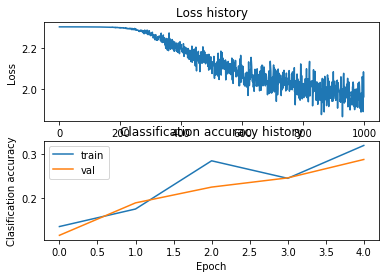

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [11]:
net.params['W1'].shape

(3072, 50)

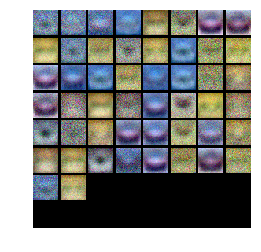

In [12]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

iteration 0 / 2000: loss 2.303660
iteration 100 / 2000: loss 1.893546
iteration 200 / 2000: loss 1.785345
iteration 300 / 2000: loss 1.719772
iteration 400 / 2000: loss 1.648787
iteration 500 / 2000: loss 1.595238
iteration 600 / 2000: loss 1.539346
iteration 700 / 2000: loss 1.417616
iteration 800 / 2000: loss 1.506094
iteration 900 / 2000: loss 1.492123
iteration 1000 / 2000: loss 1.575758
iteration 1100 / 2000: loss 1.468123
iteration 1200 / 2000: loss 1.536377
iteration 1300 / 2000: loss 1.510109
iteration 1400 / 2000: loss 1.522114
iteration 1500 / 2000: loss 1.359110
iteration 1600 / 2000: loss 1.441784
iteration 1700 / 2000: loss 1.409836
iteration 1800 / 2000: loss 1.502082
iteration 1900 / 2000: loss 1.492133
Validation accuracy:  0.506


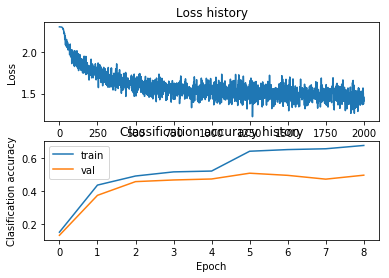

In [25]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# stats = net.train(X_train, y_train, X_val, y_val,
#             num_iters=1000, batch_size=200,
#             learning_rate=1e-4, learning_rate_decay=0.95,
#             reg=0.25, verbose=True)
num_iters=2000
learning_rate=1e-3
hidden_size=100
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=num_iters, batch_size=200,
            learning_rate=learning_rate, learning_rate_decay=0.99,
            reg=0.35, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

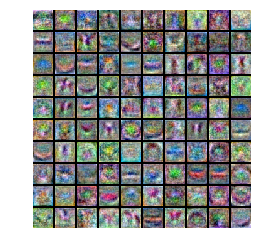

In [27]:
# visualize the weights of the best network
show_net_weights(net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [29]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.513


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:3

*Your explanation:* The gap is large is because of overfiting. The way the decrease that is increase the regularization strength